# QA DATASET

In [1]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
import re
import string
import nltk
from nltk.corpus import stopwords
import os


In [ ]:
qa_data = pd.read_csv('/content/FINAL_HG_DATASET.csv')


In [ ]:
qa_data

,index,question,generated_answer
0,!0001,3. What are the advantages of using a Ni foam ...,The advantages of using a Ni foam (NF) substra...
1,!0002,4. How does the hierarchical structure and com...,The hierarchical structure and composition of ...
2,!0003,4. What are the current challenges and limitat...,Current challenges and limitations of defect e...
3,!0004,5. What are the promising future research dire...,Promising future research directions in the fi...
4,!0005,4. How do the properties and performance of th...,The properties and performance of CTF films ca...
...,...,...,...
5711,!5712,What is the rate of hydrogen evolution (in µmo...,Hydrogen evolution rate for MoS?-based nanomat...
5712,!5713,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by Pt-Co alloy: Pt-Co alloys...
5713,!5714,What is the hydrogen production rate (in mL/mi...,Hydrogen production rate for MoS?/TiO? hybrid ...
5714,!5715,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by CoFe?O?-based photocataly...


In [ ]:
chunk=pd.read_csv('/content/cleaned_chunks (1).csv')

In [ ]:
chunk

,Chunk
0,Various methods have been developed to synthes...
1,Researchers have developed a metal-free electr...
2,"MXenes, a new class of materials, are layered ..."
3,This research focuses on the design and charac...
4,Surface photocatalysts are susceptible to degr...
...,...
146,Researchers have successfully developed ordere...
147,Defect engineering and morphological engineeri...
148,"MXenes, with their unique layered structure, e..."
149,The overexploitation of fossil fuels has led t...


In [ ]:
import re

def clean_column(text):
    if isinstance(text, str):
        # Remove only the symbols **, *, and !
        text = re.sub(r'\*\*|\*|!|\?', '', text).strip()

        text = re.sub(r'^\d+\.\s', '', text)

        # Normalize spaces (replace multiple spaces with a single space)
        text = re.sub(r'\s+', ' ', text)

    return text

# Apply the cleaning function to the specified columns in the DataFrame
qa_data['question'] = qa_data['question'].apply(clean_column)
qa_data['generated_answer'] = qa_data['generated_answer'].apply(clean_column)
chunk['Chunk'] = chunk['Chunk'].apply(clean_column)


In [ ]:
qa_data.tail(11)

,index,question,generated_answer
5705,!5706,What is the energy consumption (in kWh) for pr...,Energy consumption for producing 100 mL of hyd...
5706,!5707,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by CoMoO-based photocatalyst...
5707,!5708,What is the hydrogen production rate (in µmol/...,Hydrogen production rate for Pt/TiO photocatal...
5708,!5709,How much hydrogen (in µmol) is produced by 1 g...,Hydrogen produced by CuO-based photocatalyst: ...
5709,!5710,What is the efficiency (%) of a NiFe alloy-bas...,Efficiency of NiFe alloy-based electrochemical...
5710,!5711,How much hydrogen (in µmol/g·h) is produced by...,Hydrogen produced by BiVO-based catalyst: BiVO...
5711,!5712,What is the rate of hydrogen evolution (in µmo...,Hydrogen evolution rate for MoS-based nanomate...
5712,!5713,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by Pt-Co alloy: Pt-Co alloys...
5713,!5714,What is the hydrogen production rate (in mL/mi...,Hydrogen production rate for MoS/TiO hybrid ca...
5714,!5715,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by CoFeO-based photocatalyst...


No charts were generated by quickchart


In [ ]:
qa_data

,index,question,generated_answer
0,!0001,What are the advantages of using a Ni foam (NF...,The advantages of using a Ni foam (NF) substra...
1,!0002,How does the hierarchical structure and compos...,The hierarchical structure and composition of ...
2,!0003,What are the current challenges and limitation...,Current challenges and limitations of defect e...
3,!0004,What are the promising future research directi...,Promising future research directions in the fi...
4,!0005,How do the properties and performance of the C...,The properties and performance of CTF films ca...
...,...,...,...
5711,!5712,What is the rate of hydrogen evolution (in µmo...,Hydrogen evolution rate for MoS-based nanomate...
5712,!5713,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by Pt-Co alloy: Pt-Co alloys...
5713,!5714,What is the hydrogen production rate (in mL/mi...,Hydrogen production rate for MoS/TiO hybrid ca...
5714,!5715,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by CoFeO-based photocatalyst...


In [ ]:
qa_data.dropna(inplace=True)
chunk.dropna(inplace=True)

In [ ]:
qa_data=qa_data.drop(columns=['index'])

In [ ]:
qa_data

,question,generated_answer
0,What are the advantages of using a Ni foam (NF...,The advantages of using a Ni foam (NF) substra...
1,How does the hierarchical structure and compos...,The hierarchical structure and composition of ...
2,What are the current challenges and limitation...,Current challenges and limitations of defect e...
3,What are the promising future research directi...,Promising future research directions in the fi...
4,How do the properties and performance of the C...,The properties and performance of CTF films ca...
...,...,...
5711,What is the rate of hydrogen evolution (in µmo...,Hydrogen evolution rate for MoS-based nanomate...
5712,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by Pt-Co alloy: Pt-Co alloys...
5713,What is the hydrogen production rate (in mL/mi...,Hydrogen production rate for MoS/TiO hybrid ca...
5714,How much hydrogen (in µmol) is produced per gr...,Hydrogen produced by CoFeO-based photocatalyst...


In [ ]:
chunk

,Chunk
0,Various methods have been developed to synthes...
1,Researchers have developed a metal-free electr...
2,"MXenes, a new class of materials, are layered ..."
3,This research focuses on the design and charac...
4,Surface photocatalysts are susceptible to degr...
...,...
146,Researchers have successfully developed ordere...
147,Defect engineering and morphological engineeri...
148,"MXenes, with their unique layered structure, e..."
149,The overexploitation of fossil fuels has led t...


In [2]:
pip install --upgrade pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.2 MB/s eta 0:00:00


# Initializing Pinecone Index


In [ ]:
import os
from pinecone import Pinecone


# Initialize the Pinecone instance
pc = Pinecone(api_key=api_key)

# Define the index name to be deleted
index_name = 'hydro-question-answer'

# Check if the index exists
if index_name in pc.list_indexes().names():
    # Delete the index
    pc.delete_index(index_name)
    print(f"Index '{index_name}' has been deleted.")
else:
    print(f"Index '{index_name}' does not exist.")


Index 'hydro-question-answer' has been deleted.


In [3]:
import os
from pinecone import Pinecone

# Set the API key directly in the code
api_key = 'df47aa2a-f42c-4446-85bc-e2a4af03f79d'

# Initialize the Pinecone client using the API key
pc = Pinecone(api_key=api_key)

In [4]:
from pinecone import ServerlessSpec

cloud = os.environ.get('PINECONE_CLOUD') or 'aws'
region = os.environ.get('PINECONE_REGION') or 'us-east-1'

spec = ServerlessSpec(cloud=cloud, region=region)

In [5]:
index_name_1 = "hydro-question-answer"
index_name_2 = "hydro-chunk"

In [6]:
import time

# Check if index for questions already exists
if index_name_1 not in pc.list_indexes().names():
    # If it does not exist, create the index
    pc.create_index(
        index_name_1,
        dimension=768,  # Adjust this based on your embedding dimension
        metric='cosine',
        spec=spec
    )
    # Wait for the index to be initialized
    while not pc.describe_index(index_name_1).status['ready']:
        time.sleep(1)

# Connect to the question index
index_1 = pc.Index(index_name_1)
# View index stats for the question index
print("Question Index Stats:")
print(index_1.describe_index_stats())


Question Index Stats:
{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5716}},
 'total_vector_count': 5716}


In [7]:
# Check if index for chunks already exists
if index_name_2 not in pc.list_indexes().names():
    # If it does not exist, create the index
    pc.create_index(
        index_name_2,
        dimension=768,  # Adjust this based on your embedding dimension
        metric='cosine',
        spec=spec
    )
    # Wait for the index to be initialized
    while not pc.describe_index(index_name_2).status['ready']:
        time.sleep(1)

# Connect to the chunk index
index_2 = pc.Index(index_name_2)
# View index stats for the chunk index
print("Chunk Index Stats:")
print(index_2.describe_index_stats())

Chunk Index Stats:
{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 151}},
 'total_vector_count': 151}


# Initializing Retriever Model

In [8]:
pip install sentence-transformers

In [9]:
import torch
from sentence_transformers import SentenceTransformer

# set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load the retriever model from huggingface model hub
retriever = SentenceTransformer("flax-sentence-embeddings/all_datasets_v3_mpnet-base", device=device)
retriever

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.85k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/591 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

# Tokenization and Embedding Generation

In [ ]:
from tqdm import tqdm

In [ ]:
# Batch size for processing
batch_size = 32

for i in tqdm(range(0, len(qa_data), batch_size)):
    # Find end of batch
    i_end = min(i + batch_size, len(qa_data))

    # Extract batch
    batch = qa_data.iloc[i:i_end]

    # Generate combined inputs for embedding (QA)
    combined_inputs = [
        f"Question: {row['question']} Answer: {row['generated_answer'][:200]}"  # Limit answer length to 200 chars
        for _, row in batch.iterrows()
    ]

    # Generate embeddings for the combined input (QA)
    qa_embeddings = retriever.encode(combined_inputs).tolist()

    # Get metadata for QA
    qa_meta = batch[["question", "generated_answer"]].to_dict(orient="records")

    # Create unique IDs for QA
    qa_ids = [f"qa_{idx}" for idx in range(i, i_end)]

    # Combine the IDs, embeddings, and metadata for QA
    qa_to_upsert = list(zip(qa_ids, qa_embeddings, qa_meta))

    # Upsert/insert these records to Pinecone for QA
    _ = index_1.upsert(vectors=qa_to_upsert)

# Check that we have all vectors in the QA index
print("QA Index Stats:")
print(index_1.describe_index_stats())

100%|██████████| 179/179 [01:47<00:00,  1.66it/s]

QA Index Stats:
{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5760}},
 'total_vector_count': 5760}


In [ ]:
# We will use batches of 64
batch_size = 32

for i in tqdm(range(0, len(chunk), batch_size)):
    # Find end of batch
    i_end = min(i + batch_size, len(chunk))
    # Extract batch
    batch = chunk.iloc[i:i_end]

    # Generate embeddings for the batch (using 'Chunk' column)
    emb = retriever.encode(batch["Chunk"].tolist()).tolist()

    # Get metadata
    meta = batch.to_dict(orient="records")

    # Create unique IDs
    ids = [f"{idx}" for idx in range(i, i_end)]

    # Add all to upsert list
    to_upsert = list(zip(ids, emb, meta))

    # Upsert/insert these records to Pinecone for the chunk data
    _ = index_2.upsert(vectors=to_upsert)

# Check that we have all vectors in the index
print("Chunk Index Stats:")
print(index_2.describe_index_stats())


100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Chunk Index Stats:
{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 151}},
 'total_vector_count': 151}


# Initialize Generator

# BART

In [10]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSeq2SeqLM

model_name = "1MK26/Final_FT_BART"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model = model.to(device)


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [11]:
def query_pinecone(query, top_k):
    # Generate embeddings for the query
    xq = retriever.encode([query]).tolist()

    # Search the first Pinecone index (index_1) for the answer
    xc_qa = index_1.query(vector=xq, top_k=top_k, include_metadata=True)

    # Search the second Pinecone index (index_2) for context passage
    xc_chunk = index_2.query(vector=xq, top_k=top_k, include_metadata=True)

    return xc_qa, xc_chunk

In [ ]:
import re

def remove_questions_from_text(text):
    """Utility to remove any question-like content from the generated text."""

    # Remove any lines or fragments that start with a question mark or have question-like patterns
    # This regex pattern looks for sentences that end with a question mark or contain question-like phrases
    cleaned_text = re.sub(r'\s*\?.*$', '', text)  # Removes questions ending with a '?'
    cleaned_text = re.sub(r'(How|What|Why|Where|When|Who)\s+.*\?$', '', cleaned_text)  # Removes 'How' questions and others

    # If the answer contains any question-like fragment within it, remove those too
    cleaned_text = re.sub(r'\b(?:How|What|Why|Where|When|Who)\b.*\?', '', cleaned_text)

    return cleaned_text.strip()  # Return cleaned text, stripped of any leading/trailing whitespace

# Your query
query1 = "How much hydrogen (kg) is produced per ton of biomass in a biomass reforming process?"

# Obtaining responses from both indices
qa_result, chunk_result = query_pinecone(query1, top_k=1)

# Process and print results
print("QA Results:")
for match in qa_result['matches']:
    # Clean the retrieved content
    cleaned_answer = remove_questions_from_text(match['metadata'].get('generated_answer', ''))
    print(f"\nScore: {match['score']}, Metadata: {cleaned_answer}")

print("\nChunk Results:")
for match in chunk_result['matches']:
    # Clean the retrieved content
    cleaned_chunk = remove_questions_from_text(match['metadata'].get('Chunk', ''))
    print(f"\nScore: {match['score']}, Metadata: {cleaned_chunk}")


QA Results:

Score: 0.843566597, Metadata: The efficiency of electrolysis systems can be as high as 80% for advanced technologies, depending on optimization and operating conditions.

Chunk Results:

Score: 0.359838903, Metadata: Hydrogen production methods aim to reduce pollution and preserve ecological balance. Coal gasification, biomass conversion, thermochemical water splitting, microbial processes, electrolytic processes, and photoelectrochemical water splitting are major approaches. Electrolytic processes produce hydrogen with zero greenhouse gas emissions but require significant electricity input. Photoelectrochemical water splitting utilizes solar energy to split water, offering high solar-to-hydrogen conversion efficiency and long-term sustainability. Photocatalytic water splitting uses semiconductors to absorb light and generate electron-hole pairs for water splitting. Nanomaterials enhance the process by increasing light absorption and improving efficiency. However, research

In [ ]:
# Process and prepare the context from retrieved content
qa_context = " ".join([match['metadata']['generated_answer'] for match in qa_result['matches']])
chunk_context = " ".join([match['metadata']['Chunk'] for match in chunk_result['matches']])

# Combine the retrieved contexts
combined_context = f"{qa_context} {chunk_context}"

print(combined_context)



Energy efficiency of CuO-based catalyst in photoelectrochemical system: CuO-based catalysts in photoelectrochemical systems typically have an energy efficiency of around 30-40%. Molgh demonstrated that copper ferrite (CuFe2O4) composites loaded with graphene oxide (GO) exhibited significantly enhanced hydrogen production capabilities, outperforming bulk CuFe2O4 by orders of magnitude. A separate study also reported a substantial increase in hydrogen release when GO was incorporated into CuFe2O4. These findings highlight the potential of GO-CuFe2O4 composites as efficient photocatalysts for hydrogen generation. Furthermore, research indicates that optimizing the dosage of the catalyst and other parameters can further improve the efficiency and yield of hydrogen production. These advancements in carbon-based nanoscale photocatalysts hold promise for the development of sustainable and clean energy sources.


In [12]:
def generate_model_input(query_and_docs):
    """Tokenize the input for the BART model."""
    return tokenizer(
        query_and_docs,
        truncation=True,
        padding="max_length",
        return_tensors="pt",
        max_length=1024  # Adjust based on input size
    )

def generate_model_answer(retrieved_content, query):
    """Generate the answer using the BART model."""

    query_and_docs = retrieved_content  # Combine query and context (retrieved content)

    # Tokenize the combined input (query + retrieved content)
    model_input = generate_model_input(query_and_docs)

    generated_answers_encoded = model.generate(
        input_ids=model_input["input_ids"].to(device),
        attention_mask=model_input["attention_mask"].to(device),
        min_length=100,
        max_length=1024,
        num_beams=5,  # Explore multiple sequences
        early_stopping=True,  # Stop when the best sequence is found
        eos_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=2,
        top_p=0.9,
    )

    # Decode the generated answer
    decoded_answers = tokenizer.batch_decode(
        generated_answers_encoded,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True
    )

    return decoded_answers

In [13]:
def generate_answer(query1):
    """Main function to process the query and generate a specific, direct answer."""
    # Step 1: Obtain responses from both indices (Pinecone queries)
    qa_result, chunk_result = query_pinecone(query1, top_k=2)

    # Step 2: Select the highest-scoring match above 0.3 from both sources
    qa_highest_match = max(qa_result['matches'], key=lambda x: x['score'], default=None)
    chunk_highest_match = max(chunk_result['matches'], key=lambda x: x['score'], default=None)

    # Step 3: Choose the best answer based on score priority, preferring QA for specificity
    if qa_highest_match and qa_highest_match['score'] >= 0.4:
        retrieved_content = qa_highest_match['metadata']['generated_answer']
    elif chunk_highest_match and chunk_highest_match['score'] >= 0.4:
        retrieved_content = chunk_highest_match['metadata']['Chunk']
    else:
        # If both scores are below 0.3, return "answer not found"
        return "Answer not found"


    # Step 4: Generate answer using only the most relevant content (retrieved_content)
    decoded_answers = generate_model_answer(retrieved_content, query1)

    return decoded_answers


In [ ]:

query1 = "How much hydrogen (kg) is produced per ton of biomass in a biomass reforming process?"
generated_answer = generate_answer(query1)
print("Generated Answer:", generated_answer)

Generated Answer: ['The efficiency of electrolysis systems can be as high as 80% for advanced technologies, depending on optimization and operating conditions. For example, if you have a system that converts water to electricity, you can get up to 90% efficiency. However, this is not always the case. There are a number of factors that can affect the efficiency, such as temperature, humidity, and other factors. Examples: 1. Temperature. 2. Humidity. 3. Current. 4. Electricity. 5.']


In [ ]:
# Perform full evaluation on the generated answers
evaluation_result = full_evaluation(query1, generated_answer)



Evaluation Metrics for Answer :

Cosine Similarity: 0.9332

Perplexity: 15.1619

Unigram Diversity: 0.9000

Bigram Diversity: 1.0000


# Evaluation

In [14]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.util import ngrams
import torch


In [15]:
# Load GPT-2 for perplexity calculation
perplexity_model = GPT2LMHeadModel.from_pretrained('gpt2')
perplexity_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load the embedding model for cosine similarity (using sentence-transformers)
embed_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:


# Function to compute various evaluation metrics
def full_evaluation(query, answers):
    # Compute embeddings for similarity calculation
    def compute_embeddings(text):
        embeddings = embed_model.encode(text, convert_to_tensor=True)
        return embeddings

    # Initialize metrics dictionary
    metrics = {
        'cosine_similarities': [],
        'perplexities': [],
        'unigram_diversities': [],
        'bigram_diversities': []
    }

    for answer in answers:
        # Compute cosine similarity between the query and the generated answer
        query_embedding = compute_embeddings(query)
        answer_embedding = compute_embeddings(answer)
        similarity_score = cosine_similarity(query_embedding.cpu().numpy().reshape(1, -1),
                                             answer_embedding.cpu().numpy().reshape(1, -1))[0][0]

        # Calculate perplexity for the generated answer
        inputs = perplexity_tokenizer(answer, return_tensors='pt')
        with torch.no_grad():
            loss = perplexity_model(**inputs, labels=inputs['input_ids'])[0]
        perplexity_score = torch.exp(loss).item()

        # Function to calculate n-gram diversity
        def ngram_diversity(text, n=1):
            ngrams_list = list(ngrams(text.split(), n))
            if not ngrams_list:
                return 0
            unique_ngrams = set(ngrams_list)
            return len(unique_ngrams) / len(ngrams_list)

        # Calculate unigram and bigram diversity
        unigram_diversity = ngram_diversity(answer, n=1)
        bigram_diversity = ngram_diversity(answer, n=2)

        # Append metrics for this answer
        metrics['cosine_similarities'].append(similarity_score)
        metrics['perplexities'].append(perplexity_score)
        metrics['unigram_diversities'].append(unigram_diversity)
        metrics['bigram_diversities'].append(bigram_diversity)

    # Print the evaluation metrics
    for i in range(len(answers)):
        print(f"\nEvaluation Metrics for Answer :")
        print(f"Cosine Similarity: {metrics['cosine_similarities'][i]:.4f}")
        print(f"Perplexity: {metrics['perplexities'][i]:.4f}")
        print(f"Unigram Diversity: {metrics['unigram_diversities'][i]:.4f}")
        print(f"Bigram Diversity: {metrics['bigram_diversities'][i]:.4f}")

    return metrics



In [ ]:
# Perform full evaluation on the generated answers
evaluation_result = full_evaluation(query1, generated_answer)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Evaluation Metrics for Answer :
Cosine Similarity: 0.9332
Perplexity: 15.1620
Unigram Diversity: 0.9000
Bigram Diversity: 1.0000


## Testing

In [ ]:
query1 = "different types of hydrogen generation?"
generated_answer = generate_answer(query1)
print("Generated Answer:", generated_answer)
evaluation_result = full_evaluation(query1, generated_answer)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Generated Answer: ['Hydrogen can be produced from a variety of sources, but the most common is steam reforming. This is a process where steam is mixed with oxygen and water to produce hydrogen. There are several types of hydrogen generation, depending on the type of steam used.']


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Evaluation Metrics for Answer :
Cosine Similarity: 0.7942
Perplexity: 9.4684
Unigram Diversity: 0.8222
Bigram Diversity: 1.0000


In [19]:
import pandas as pd

# Function to load the CSV file and get queries
def load_queries_from_csv(csv_file_path, query_column):
    """Loads the queries from a CSV file."""
    df = pd.read_csv(csv_file_path)
    queries = df[query_column].tolist()  # Extract the queries from the specified column
    return queries

# Function to save results to CSV file
def save_evaluation_results(output_file_path, results):
    """Saves the evaluation results to a CSV file."""
    df = pd.DataFrame(results)
    df.to_csv(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")


csv_file_path = '/content/Cleaned_Hydrogen_Generation_Questions.csv'
query_column = 'Question'

# Load queries from CSV
queries = load_queries_from_csv(csv_file_path, query_column)

# Initialize list to hold results
evaluation_results = []

# Process each query from the CSV
for query1 in queries:
    generated_answer = generate_answer(query1)

    # Evaluate the generated answer
    evaluation_result = full_evaluation(query1, generated_answer)

    # Print the query, generated answer, and evaluation result
    print(f"Query: {query1}")
    print(f"Generated Answer: {generated_answer}")
    print(f"Evaluation Result: {evaluation_result}\n")

    # Store query, answer, and evaluation result
    evaluation_results.append({
        'Query': query1,
        'Generated Answer': generated_answer,
        'Evaluation': evaluation_result
    })

# Optionally, save the results to a CSV file
output_file_path = '/content/evaluation_results.csv'  # Update with your desired path
save_evaluation_results(output_file_path, evaluation_results)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8017
Perplexity: 12.6642
Unigram Diversity: 0.7822
Bigram Diversity: 1.0000
Query: What is hydrogen generation, and why is it important?
Generated Answer: ['Hydrogen generation is the process of producing hydrogen gas (H2) from various sources. Hydrogen gas can be produced through several methods, including: Steam reforming of hydrocarbons (e.g., natural gas, coal) Water electrolysis Coal gasification Biomass gasifiers Hydroelectric power plants (hydroelectric, wind, solar, nuclear, hydro-electric) Fuel cells (fuel cells that use hydrogen to power a generator) The main advantage of hydrogen is that it has a high energy density, making it a promising candidate for fuel cells and other energy storage systems. It also provides a clean, sustainable, and versatile energy source that can help reduce carbon emissions and enhance energy security.']
Evaluation Result: {'cosine_similarities': [0.8016629], 'perplexities': [12.664216995239258],

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8282
Perplexity: 9.9769
Unigram Diversity: 0.8021
Bigram Diversity: 1.0000
Query: What is water splitting, and how does it produce hydrogen?
Generated Answer: ['Water splitting is a chemical process that breaks down water molecules into hydrogen (H2O) and oxygen (O2) using an external energy source. This is done by heating the water to very high temperatures (typically over 800°C) in the presence of a catalyst. The heat causes the molecules to break down, and the resulting gases are then collected separately. Hydrogen can be used as a fuel for fuel cells, in internal combustion engines, or for various industrial processes. It has the potential to reduce our reliance on fossil fuels and contribute to a more sustainable energy future.']
Evaluation Result: {'cosine_similarities': [0.8282066], 'perplexities': [9.976883888244629], 'unigram_diversities': [0.8020833333333334], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5875
Perplexity: 26.4799
Unigram Diversity: 0.8438
Bigram Diversity: 1.0000
Query: What are 2D nanomaterials?
Generated Answer: ['Two-Dimensional (2D) Nanomaterials are atomically thin materials with a thickness of a single atom or a few atomic layers. They possess unique properties and applications due to their reduced dimensionality and quantum confinement effects. The properties of two-dimensional materials can be tailored by controlling their thickness, composition, and structure. For example, Graphene Transition Metal dichalcogenides (e.g., MoS2, WS2) Boron nitride Phosphorene Black phosphorusApplications: Electronics: Transistors, sensors, optoelectronic devices Energy Storage: Batteries, supercapacitors and fuel cells Catalysis: Highly efficient and selective catalysts Membranes: Separation and filtration applications Composites: Lightweight and strong materials for aerospace and automotive industries']
Evaluation Result: {'c

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7633
Perplexity: 32.6560
Unigram Diversity: 0.7967
Bigram Diversity: 1.0000
Query: Why are 2D materials considered for hydrogen generation?
Generated Answer: ['2D materials are considered for hydrogen generation due to their unique properties that make them promising candidates for efficient and sustainable hydrogen production: High surface area to volume ratio, which provides a large number of active sites for catalytic reactions, such as water splitting and photocatalytic Hydrogen production. Stability and durability: Two-dimensional materials can withstand harsh chemical environments and high temperatures, ensuring long-term performance and reliability. They are generally stable and durable under the conditions required for H2O generation. Tunable electronic properties: The electrons and holes can be precisely controlled by modifying their composition, doping, or stacking. This tunability allows researchers to optimize the materi

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8127
Perplexity: 13.5679
Unigram Diversity: 0.7241
Bigram Diversity: 1.0000
Query: What role do catalysts play in water splitting?
Generated Answer: ["Catalysts play a crucial role in water splitting by reducing the activation energy required for the reaction to occur. Water splitting is a thermodynamically uphill reaction, meaning that it requires an input of energy to proceed. In order to do this, you need to lower the energy barrier, which is the temperature at which the reactants are able to interact with each other. If you don't have a catalyst, then you can't do that, so you have to find a way to make the reactions more efficient."]
Evaluation Result: {'cosine_similarities': [0.81274736], 'perplexities': [13.567907333374023], 'unigram_diversities': [0.7241379310344828], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7033
Perplexity: 16.5782
Unigram Diversity: 0.8421
Bigram Diversity: 1.0000
Query: What are some common 2D nanomaterials used in hydrogen production?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but graphene is a 2D material with a puckered honeycomb structure. It has a high surface area and excellent electrical conductivity, making it a promising candidate for HER. Graphene has tunable electronic properties and can be used as both HER and OER catalysts. I don't know if it's used in hydrogen production in the same way as graphene, though, so I can't comment on that."]
Evaluation Result: {'cosine_similarities': [0.7032912], 'perplexities': [16.57818031311035], 'unigram_diversities': [0.8421052631578947], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6535
Perplexity: 35.1430
Unigram Diversity: 0.7912
Bigram Diversity: 1.0000
Query: How does the structure of 2D nanomaterials affect their catalytic properties?
Generated Answer: ['The structure of 2D nanomaterials plays a crucial role in determining their catalytic activity, selectivity, and stability for hydrogen production reactions. For example, for the oxygen evolution reaction (OER), the high surface area and abundant edge sites can promote the adsorption and activation of reactants. The bandgap, work function and density of states can influence their electronic properties, such as the size of the band gap, the number of active sites per unit mass, etc. These factors can be introduced intentionally through chemical or physical treatments to enhance the catalytical activity.']
Evaluation Result: {'cosine_similarities': [0.65354794], 'perplexities': [35.14299774169922], 'unigram_diversities': [0.7912087912087912], 'bigram_divers

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7839
Perplexity: 12.9563
Unigram Diversity: 0.6699
Bigram Diversity: 1.0000
Query: What is the principle of photocatalysis in hydrogen generation?
Generated Answer: ['Photocatalysis is a process that uses light energy to drive a chemical reaction. In the context of hydrogen generation, it is the use of a photocatalyst material to split water into hydrogen and oxygen using light. The process is called redox reactions, and it involves electrons and holes reacting with water molecules to form hydrogen gas (H2). The efficiency of the reaction depends on various factors, including the material, the light source, etc. There are a number of ways to improve the efficiency, but the most common way is to use a new material that absorbs light in the ultraviolet or visible spectrum.']
Evaluation Result: {'cosine_similarities': [0.7839048], 'perplexities': [12.956277847290039], 'unigram_diversities': [0.6699029126213593], 'bigram_diversities': [

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7151
Perplexity: 26.0766
Unigram Diversity: 0.7111
Bigram Diversity: 1.0000
Query: How does the bandgap of 2D materials influence their effectiveness in water splitting?
Generated Answer: ['The bandgap of 2D materials significantly influences their effectiveness in water splitting due to its impact on the absorption of light energy and the redox potentials of the photogenerated charge carriers. A material with a band gap of 1.23 eV will absorb visible light, which is abundant and cost-effective. However, the energy required to split water into hydrogen and oxygen is much higher than the amount of energy needed to absorb the light. Therefore, a material that is close to this value will have sufficient energy to drive the reaction.']
Evaluation Result: {'cosine_similarities': [0.71511036], 'perplexities': [26.07659149169922], 'unigram_diversities': [0.7111111111111111], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7929
Perplexity: 8.1778
Unigram Diversity: 0.8171
Bigram Diversity: 1.0000
Query: What are the potential environmental benefits of hydrogen as an energy source?
Generated Answer: ["Hydrogen has a high energy content per unit mass, making it a very efficient fuel source. It's also abundant, so it can be produced from renewable sources, such as solar and wind energy. Hydrogen can also be used in a variety of applications, including fuel cells, internal combustion engines, and gas turbines. The main advantage of hydrogen is that it burns cleanly, producing only water vapor as a byproduct. This makes it an environmentally friendly fuel, but it's not a perfect fuel."]
Evaluation Result: {'cosine_similarities': [0.79289836], 'perplexities': [8.177752494812012], 'unigram_diversities': [0.8170731707317073], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7742
Perplexity: 26.3067
Unigram Diversity: 0.7848
Bigram Diversity: 1.0000
Query: How do 2D materials enhance the efficiency of photocatalytic water splitting?
Generated Answer: ["2D materials have a large surface area relative to their volume, which allows more active sites for the photocatalytic reactions to take place. This allows for efficient separation and migration of photogenerated charge carriers, reducing recombination losses and improving the efficiency of the material. It's also possible to combine 2D with other materials to form heterostructures or composites. These hybrid materials can further enhance the energy efficiency by improving light absorption, promoting charge transfer, and providing additional reactive sites."]
Evaluation Result: {'cosine_similarities': [0.7742077], 'perplexities': [26.306684494018555], 'unigram_diversities': [0.7848101265822784], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7878
Perplexity: 25.9078
Unigram Diversity: 0.8851
Bigram Diversity: 1.0000
Query: What are the advantages of using graphene-based materials for hydrogen generation?
Generated Answer: ['Graphene-based materials offer several advantages for hydrogen generation: High surface area, providing a large number of active sites for catalytic reactions. This enhances the efficiency of hydrogen production processes, such as water splitting and photocatalytic Hydrogen generation. High electrical conductivity, which facilitates the transfer of electrons during H2O generation reactions, making it a highly conductive material. It can withstand harsh chemical environments and high temperatures, ensuring reliable performance over time. The tunable electronic properties of graphene can be precisely controlled by modifying its structure, doping, or functionalization.']
Evaluation Result: {'cosine_similarities': [0.7878095], 'perplexities': [25.9077548

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7411
Perplexity: 38.0655
Unigram Diversity: 0.7656
Bigram Diversity: 0.9921
Query: How does the surface area of 2D nanomaterials impact their catalytic performance?
Generated Answer: ['The surface area of 2D nanomaterials plays a crucial role in their catalytic activity due to the following factors: Increased Active Sites: Each active site can serve as a reaction center where reactants can adsorb and undergo chemical transformations. Stronger adsorption promotes efficient interaction between the reactant and the catalyst, facilitating the activation of catalysts and initiation of reactions. This improved mass transport ensures a steady supply of reactive products and efficient removal of products. Improved Mass Transport: A larger surface surface reduces the diffusion limitations for reactive molecules and products, preventing surface saturation and maintaining catalytical activity. Tunable Surface Properties: The surface can be mod

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7532
Perplexity: 21.5244
Unigram Diversity: 0.7045
Bigram Diversity: 1.0000
Query: What are the challenges associated with the stability of 2D nanomaterials in water splitting?
Generated Answer: ['Chemical stability plays a crucial role in the long-term performance of 2D nanomaterials in water splitting: Degradation mechanisms can be susceptible to various degradation mechanisms during Water splitting, including photocorrosion, chemical etching, and oxidation. These degradation processes can lead to the loss of active sites, reduced surface area and diminished photocatalytic activity over time. By introducing protective layers or coatings on the surface of these materials, their susceptibility to degradation is reduced, leading to improved long term performance. Stability under reaction conditions: The chemical stability of two-dimensional materials under water-splitting conditions is critical. The presence of corrosive species (suc

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8916
Perplexity: 41.6250
Unigram Diversity: 0.7080
Bigram Diversity: 1.0000
Query: How can doping with different elements improve the properties of 2D nanomaterials for hydrogen production?
Generated Answer: ['Doping 2D nanomaterials with different elements can significantly improve their properties for hydrogen production in several ways: Electronic structure modification: Doping introduces additional electron donors or acceptors into the electronic structure and bandgap. This modification can enhance the absorption of light energy, improve charge carrier separation, and optimize the redox potential of hydrogen evolution or oxygen evolution reactions. It can also improve the conductivity of the material, reducing the resistance to electron flow. Stability improvement: This is the most important aspect of doping, as it allows for the formation of defects or vacancies in the crystal structure. These defects can act as active sites fo

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8644
Perplexity: 15.1484
Unigram Diversity: 0.8037
Bigram Diversity: 1.0000
Query: What techniques are used to synthesize 2D nanomaterials for water splitting applications?
Generated Answer: ['There are a number of different techniques that can be used to synthesize 2D nanomaterials for water splitting applications, each with its own advantages and limitations. Here are some commonly used techniques: Chemical vapor deposition (CVD): CVD involves the deposition of individual atoms or molecules on a substrate surface from gaseous precursors. This method allows for precise control over the growth parameters, allowing for the synthesis of high-quality and large-area two-dimensional (2D) materials. The reaction conditions, such as temperature, pressure, and precursor concentration can all be controlled to obtain specific 3D Nanostructures with desired properties. These methods are generally used for high performance and high cost-effecti

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7348
Perplexity: 10.4960
Unigram Diversity: 0.6820
Bigram Diversity: 1.0000
Query: How does the synthesis method affect the properties of 2D nanomaterials?
Generated Answer: ['The synthesis method significantly influences the properties of 2D nanomaterials, including their structure, morphology, size, crystallinity, and electronic properties. Here\'s how different synthesis methods can affect these properties: **Exfoliation**: This is the most common form of synthesis, but it\'s not the only one. It can be done in a variety of ways, depending on the type of material used, the temperature of the reaction, etc. **Chemical vapor deposition** (CVD) is a common method used to produce materials with specific shapes, patterns, or orientations. You can use CVD to create materials that have specific properties, such as high surface area, low melting point, high electronic and optical properties (e.g. high electrical conductivity). **Hydrothe

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7351
Perplexity: 33.2402
Unigram Diversity: 0.8391
Bigram Diversity: 1.0000
Query: What is the significance of heterostructures in enhancing water splitting performance?
Generated Answer: ['Heterostructures, which are interfaces between two or more different materials, play a crucial role in enhancing water splitting performance due to several key factors: Tailored band alignment: This allows for the engineering of band alignments at the interface, optimizing the flow of charge carriers and reducing recombination losses. For example, combining a wide bandgap semiconductor with a narrow-bandgap silicon can extend the light absorption range and enhance the overall photocatalytic activity. This can increase the surface area available for catalytic reactions, resulting in higher hydrogen production rates.']
Evaluation Result: {'cosine_similarities': [0.73510456], 'perplexities': [33.24018859863281], 'unigram_diversities': [0.83908045977

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8899
Perplexity: 22.1820
Unigram Diversity: 0.7653
Bigram Diversity: 1.0000
Query: How do 2D nanomaterials interact with light during the photocatalytic process?
Generated Answer: ['2D nanomaterials interact with light during the photocatalytic process in several important ways: 1. Charge generation: When a photon of light is absorbed by a 2D nano-material, it can excite an electron from the valence band to the conduction band. This can be used to drive the redox reactions that lead to hydrogen or oxygen production. 2. Surface reactions: The photogenerated charge carriers can participate in surface reactions on the surface of the material, such as the adsorption/desorbption behavior of reactants and products. 3. Charged electron-hole pairs can transfer to other materials or molecules involved in the reaction.']
Evaluation Result: {'cosine_similarities': [0.8899486], 'perplexities': [22.182003021240234], 'unigram_diversities': [0.765

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8638
Perplexity: 21.9039
Unigram Diversity: 0.6855
Bigram Diversity: 1.0000
Query: What are the main reaction mechanisms involved in photocatalytic water splitting?
Generated Answer: ['The main reaction mechanisms involved in photocatalytic water splitting are: Light absorption: The first step is the absorption of light energy by the water molecules, which generates electron-hole pairs. The electrons are used to oxidize water molecule, producing oxygen and protons (H+). This reaction typically occurs on the surface of the catalyst, but can also occur on a separate cocatalyst. This separation can be facilitated by built-in electric fields or the presence of an electric field. Charged electrons must be separated to prevent recombination and allow them to participate in the redox reactions. Charge separation must also be prevented by a magnetic field, or else the electrons will recombine and form hydrogen gas. Hydrogen gas is produced 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8440
Perplexity: 33.4283
Unigram Diversity: 0.7805
Bigram Diversity: 0.9877
Query: How can surface modifications of 2D nanomaterials improve their photocatalytic activity?
Generated Answer: ['Surface modifications of 2D nanomaterials can significantly improve their photocatalytic activity by: Enhancing light absorption: Surface modifications can introduce new optical properties or alter the bandgap of the material, enabling it to absorb a broader range of light wavelengths. This can lead to increased light harvesting and improved light efficiency. Promoting charge separation: Surfaces can create defects or introduce heterojunctions that facilitate the separation of photogenerated electron-hole pairs. By reducing recombination losses, more charge carriers are available for participating in the reaction.']
Evaluation Result: {'cosine_similarities': [0.843968], 'perplexities': [33.42826461791992], 'unigram_diversities': [0.780487804878

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8211
Perplexity: 50.7511
Unigram Diversity: 0.7248
Bigram Diversity: 1.0000
Query: How do the electronic properties of 2D nanomaterials influence their hydrogen production efficiency?
Generated Answer: ['The electronic properties of 2D nanomaterials significantly influence their hydrogen production efficiency in several ways: Bandgap: The wavelength of light it can absorb. For efficient photocatalytic Hydrogen production, the bandgap should be suitable to absorb a significant portion of the solar spectrum, typically in the visible or near-infrared region. The density of states determines the availability of charge carriers for the hydrogen evolution reaction or oxygen evolution reactions. A high DOS near the conduction band edge promotes the oxidation of water for oxygen production. High charge carrier mobility ensures the efficient movement of photogenerated electrons and holes to the active sites for hydrogen or Oxygen production 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5101
Perplexity: 16.5782
Unigram Diversity: 0.8421
Bigram Diversity: 1.0000
Query: What computational methods are used to predict the performance of 2D nanomaterials in hydrogen generation?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but graphene is a 2D material with a puckered honeycomb structure. It has a high surface area and excellent electrical conductivity, making it a promising candidate for HER. Graphene has tunable electronic properties and can be used as both HER and OER catalysts. I don't know if it's used in hydrogen production in the same way as graphene, though, so I can't comment on that."]
Evaluation Result: {'cosine_similarities': [0.5100658], 'perplexities': [16.57818031311035], 'unigram_diversities': [0.8421052631578947], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6212
Perplexity: 7.0602
Unigram Diversity: 0.6609
Bigram Diversity: 1.0000
Query: How can combining different 2D materials create synergies in photocatalytic activity?
Generated Answer: ["There are a number of ways to make photocatalysts. The most common way is to use different materials with different properties. For example, if you have a material that absorbs light in a specific band, you can use that material as a catalyst for the production of hydrogen. If you use a different material, it can be used to catalyze the formation of oxygen, but it won't be able to produce hydrogen because it doesn't have the same absorption properties as the other material. Another way to do this is by using different types of materials that absorb different wavelengths of light. This is called plasmonic absorption, and it's a very common technique in chemistry."]
Evaluation Result: {'cosine_similarities': [0.6211879], 'perplexities': [7.0602035522

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8372
Perplexity: 21.2314
Unigram Diversity: 0.7629
Bigram Diversity: 1.0000
Query: What are the effects of varying the thickness of 2D nanomaterials on their catalytic properties?
Generated Answer: ['Varying the thickness of 2D nanomaterials can significantly affect their catalytic properties, including: Surface area: The surface area per unit mass of the material determines how much energy can be absorbed by it. Thinner materials tend to have a larger Surface Area per Unit Mass, which means more active sites for photocatalytic reactions. This can lead to reduced recombination losses, leading to improved charge transport and reduced energy loss. The thickness can also affect the electronic structure of a material, such as its bandgap and density of states. Electronic properties can affect its mechanical strength and flexibility.']
Evaluation Result: {'cosine_similarities': [0.837162], 'perplexities': [21.2314395904541], 'unigram_div

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8720
Perplexity: 12.1847
Unigram Diversity: 0.7105
Bigram Diversity: 1.0000
Query: What role does temperature play in the efficiency of hydrogen production via water splitting?
Generated Answer: ['Temperature plays a crucial role in the efficiency of hydrogen production via water splitting in several ways: Reaction kinetics: The rate of the reaction increases with increasing temperature. Higher temperatures provide more energy to the reactants, allowing them to overcome the activation energy barrier and react more quickly. This can affect the rate at which the hydrogen and oxygen are produced, as well as the amount of time it takes for the reactions to occur. Stability of materials: Depending on the type of catalyst used, it can be affected by the temperature, and how the catalyst reacts with the water. Some catalysts are better at high temperatures, while others are worse at low temperatures.']
Evaluation Result: {'cosine_similarit

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5141
Perplexity: 6.1624
Unigram Diversity: 0.5566
Bigram Diversity: 1.0000
Query: How can the stability of 2D nanomaterials be assessed during long-term water splitting experiments?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you need to understand what a nanometer is. It's a measure of how many atoms are in a molecule, and how much energy it takes to move them from one place to another. So, let's say you have a bunch of atoms in the middle of a piece of paper. If you want to know how long it will take for the paper to break down into smaller and smaller pieces, then you can look at the size of the pieces. Now, if you take that paper and put it in water, it's going to be a lot smaller than it was when you took it out of water. This is because water is a very good conductor of energy, so it can move things around very quickly. The bigger the piece, the faster the water w

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6592
Perplexity: 16.5782
Unigram Diversity: 0.8421
Bigram Diversity: 1.0000
Query: What are the future prospects for using 2D nanomaterials in commercial hydrogen production systems?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but graphene is a 2D material with a puckered honeycomb structure. It has a high surface area and excellent electrical conductivity, making it a promising candidate for HER. Graphene has tunable electronic properties and can be used as both HER and OER catalysts. I don't know if it's used in hydrogen production in the same way as graphene, though, so I can't comment on that."]
Evaluation Result: {'cosine_similarities': [0.6592357], 'perplexities': [16.57818031311035], 'unigram_diversities': [0.8421052631578947], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7063
Perplexity: 15.8225
Unigram Diversity: 0.7429
Bigram Diversity: 1.0000
Query: How can 2D nanomaterials contribute to the development of sustainable energy solutions?
Generated Answer: ['2D nanomaterials can contribute to the development of sustainable energy solutions in several ways: 1. Hydrogen production: 2D nano-materials have shown great promise as efficient and durable catalysts for hydrogen production through water splitting. Their unique properties, such as high surface area and tunable electronic structure, enable them to facilitate the electrochemical reactions involved in hydrogen splitting, leading to improved water production efficiency. 2. Solar energy conversion: Solar cells can be used as active materials in solar cells to convert sunlight into electricity. They have been shown to be able to absorb a broad range of light wavelengths, coupled with their high charge carrier mobility, makes them promising candidate

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8161
Perplexity: 10.1255
Unigram Diversity: 0.7143
Bigram Diversity: 1.0000
Query: What are the economic implications of using 2D materials in hydrogen generation technologies?
Generated Answer: ['There are a number of problems with using 2D materials for large-scale hydrogen production. The first is that they have to be able to absorb and reflect light in a way that allows them to produce a large amount of energy per unit volume. This is not easy to do. Second, they need to have a high surface area, high bandgap, and tunable band gap. These are all things that are very difficult to achieve with conventional materials. Third, there is a lot of work going on to make sure that the materials are stable under the harsh conditions required for the production of hydrogen, such as high temperatures and acidic environments.']
Evaluation Result: {'cosine_similarities': [0.81607914], 'perplexities': [10.125532150268555], 'unigram_diversities'

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7370
Perplexity: 22.7018
Unigram Diversity: 0.8750
Bigram Diversity: 1.0000
Query: How do 2D nanomaterials compare to traditional catalysts in terms of performance and cost?
Generated Answer: ['2D nanomaterials have a very high surface area-to-volume ratio, which provides a large number of active sites for catalytic reactions. Traditional catalysts often rely on expensive precious metals, such as platinum or palladium. 2D nanoparticles can be produced in a scalable manner using various techniques, including CVD and liquid phase exfoliation. This scalability allows for the cost to be reduced, while their scalable production and reduced precious metal usage contribute to cost-effectiveness.']
Evaluation Result: {'cosine_similarities': [0.73704255], 'perplexities': [22.701820373535156], 'unigram_diversities': [0.875], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7440
Perplexity: 12.7993
Unigram Diversity: 0.6930
Bigram Diversity: 1.0000
Query: What regulatory challenges exist for implementing hydrogen production using 2D nanomaterials?
Generated Answer: ['The major challenges in scaling up the production of hydrogen through 2D nanomaterial-based water splitting include: Cost: It can be difficult to scale up production to the large quantities that would be needed for commercial applications. This is because the synthesis of two-dimensional materials is often a complex and time-consuming process. Scalability: There is a lot of research being conducted to overcome these challenges, but there is still a great deal of work to be done. Stability: The stability of 2-D materials in water-splitting devices depends on the temperature and pH of the water, as well as how well the device can handle the high temperatures and pressures required for the splitting of water.']
Evaluation Result: {'cosine_sim

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4990
Perplexity: 12.5894
Unigram Diversity: 0.8228
Bigram Diversity: 1.0000
Query: How can public perception of hydrogen energy influence its adoption?
Generated Answer: ['Hydrogen production costs are higher than fossil fuels, particularly when produced from renewable energy sources. Hydrogen Storage and Transportation: Developing safe, efficient, and cost-effective methods for storing and transporting large quantities of hydrogen remains a challenge. Fuel Cell Efficiency and Durability: Improving the efficiency and durability of fuel cells, especially in heavy-duty applications, is essential for widespread adoption in transportation. There are a number of companies working on improving fuel cell efficiency, but they are still in their infancy.']
Evaluation Result: {'cosine_similarities': [0.4990007], 'perplexities': [12.589422225952148], 'unigram_diversities': [0.8227848101265823], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8560
Perplexity: 15.7578
Unigram Diversity: 0.7143
Bigram Diversity: 1.0000
Query: What role do government policies play in advancing research on hydrogen generation technologies?
Generated Answer: ['Government policies play a crucial role in advancing research on hydrogen generation technologies in several ways: Funding and research grants: Governments can provide funding to universities, research institutions, and companies to support basic and applied research. This funding can enable researchers to explore novel approaches, develop new materials and catalysts, optimize existing technologies. It can also encourage private sector investment in research and development. Tax incentives and subsidies: The government can offer tax breaks to companies that invest in hydrogen power plants. These incentives can help reduce the financial risks associated with hydrogen production and make it more attractive for companies in this field to i

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6277
Perplexity: 7.8955
Unigram Diversity: 0.6700
Bigram Diversity: 1.0000
Query: How can life cycle assessments be used to evaluate the sustainability of hydrogen production methods?
Generated Answer: ["LCAs can be used to compare the environmental impacts of different hydrogen production methods and make informed decisions about the most sustainable option. For example, if you want to know how much energy is needed to produce a kilogram of hydrogen, you can use an LCAs to determine the amount of energy used in the process, and then compare that to the total energy consumption of the entire process. This can help you make a better decision about which method is best for the environment, as well as make sure that you don't end up with a lot of waste."]
Evaluation Result: {'cosine_similarities': [0.6276716], 'perplexities': [7.895468235015869], 'unigram_diversities': [0.67], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8203
Perplexity: 16.0534
Unigram Diversity: 0.7573
Bigram Diversity: 1.0000
Query: What are the potential risks associated with the large-scale use of nanomaterials in hydrogen production?
Generated Answer: ["The large-scale use of nanomaterials in hydrogen production poses several potential risks that need to be carefully considered and managed: Environmental risks: There is a lot of concern about the release of hydrogen into the environment, and their potential effects on ecosystems and human health. It is important to conduct thorough risk assessments and implement appropriate risk management strategies to mitigate these potential hazards. There are several ways to minimize exposure and protect workers' health, including occupational safety measures, personal protective equipment, etc. The risk of unintended consequences may lead to the development of antimicrobial resistance or the disruption of natural biogeochemical cycles."]


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6910
Perplexity: 17.3802
Unigram Diversity: 0.7826
Bigram Diversity: 1.0000
Query: How do 2D nanomaterials fit into the broader context of renewable energy technologies?
Generated Answer: ['Graphene and transition metal dichalcogenides (TMDs) have exceptional light absorption and charge transport properties, making them promising materials for photovoltaics and solar cells. Their high surface area and unique electrochemical properties can improve the energy density and power output of energy storage devices, enabling efficient storage and release of renewable energy. They can act as catalysts for biomass breakdown and facilitate the conversion of biomass into fuels, such as bioethanol and biodiesel. Wind energy: 2D nanomaterials can be used to develop lightweight and durable wind turbine blades, harnessing wind energy more effectively.']
Evaluation Result: {'cosine_similarities': [0.6910031], 'perplexities': [17.380233764648438], 'u

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6679
Perplexity: 12.7993
Unigram Diversity: 0.6930
Bigram Diversity: 1.0000
Query: What interdisciplinary approaches are necessary to advance research in hydrogen production via water splitting?
Generated Answer: ['The major challenges in scaling up the production of hydrogen through 2D nanomaterial-based water splitting include: Cost: It can be difficult to scale up production to the large quantities that would be needed for commercial applications. This is because the synthesis of two-dimensional materials is often a complex and time-consuming process. Scalability: There is a lot of research being conducted to overcome these challenges, but there is still a great deal of work to be done. Stability: The stability of 2-D materials in water-splitting devices depends on the temperature and pH of the water, as well as how well the device can handle the high temperatures and pressures required for the splitting of water.']
Evaluation Re

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8626
Perplexity: 18.8860
Unigram Diversity: 0.7073
Bigram Diversity: 1.0000
Query: How can machine learning be applied to optimize the design of 2D nanomaterials for hydrogen generation?
Generated Answer: ['Machine learning (ML) can be applied to the discovery and optimization of 2D materials for hydrogen generation in several ways:Discovery of new materials: ML models are trained on a database of known materials and their properties to identify promising candidates for Hydrogen generation. These models can then be used to screen large chemical space and predict the key factors that influence the performance of the material and how changes in these factors will affect its properties. Optimization of existing materials, such as bandgap, electronic structure, and catalytic activity: This is an area of active research in the field of materials science and engineering. There is a lot of research going on in this area right now, but it i

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5199
Perplexity: 5.9007
Unigram Diversity: 0.6483
Bigram Diversity: 1.0000
Query: How does collaboration between academia and industry facilitate advancements in hydrogen technologies?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but I'll give it a shot. I'm currently working on a project at a university in the UK that is trying to develop a hydrogen fuel cell. The project is called Hydrogen Fuel Cell, and it's being funded by the British government. There are a number of ways to get funding for this project. Firstly, you can apply for a grant from the government, which will allow you to do the research you want. Secondly, if you are in a country that doesn't have a public-private partnership, then you have to apply to a private company for funding. Thirdly, there is a lot of research that needs to be done in order for the technology to become commercially viable, so you need to find a company that wi

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8586
Perplexity: 13.8391
Unigram Diversity: 0.7340
Bigram Diversity: 1.0000
Query: What are the main funding sources for research on hydrogen generation and nanomaterials?
Generated Answer: ['The main funding sources for research on hydrogen generation and nanomaterials include: Government agencies: National and international government agencies, such as the U.S. Department of Energy, the European Union Horizon 2020 program, and the Japan Science and Technology Agency, provide significant funding in these areas. Private companies: Companies involved in the energy, automotive and chemical industries often invest in research and development of new technologies and products. These companies have a vested interest in advancing hydrogen technologies for commercial applications. Universities and research institutions often receive funding from government institutions, private companies and foundations.']
Evaluation Result: {'cosine_simila

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6714
Perplexity: 26.5620
Unigram Diversity: 0.7381
Bigram Diversity: 0.9880
Query: How can data sharing and open science contribute to faster advancements in this field?
Generated Answer: ["Data sharing and open science can contribute to faster advancements in hydrogen generation and nanomaterials research in several ways: Accelerated knowledge dissemination: Open sharing of research data and results allows scientists to access and build upon each other's work more quickly, leading to the identification of new research directions. Improved reproducibility and transparency: Data sharing allows other researchers to independently verify and reproduce results, increasing the credibility and reliability of scientific findings. This can help researchers extract meaningful insights from large and complex datasets."]
Evaluation Result: {'cosine_similarities': [0.6714482], 'perplexities': [26.562000274658203], 'unigram_diversities': [0.73809

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8972
Perplexity: 15.1085
Unigram Diversity: 0.7708
Bigram Diversity: 1.0000
Query: What role do conferences and workshops play in the development of hydrogen generation technologies?
Generated Answer: ['There are a few ways in which conferences and workshops can contribute to the development of hydrogen generation technologies. The first is that they provide a platform for researchers to share their latest findings, discuss ongoing challenges, and explore future research directions. This allows researchers and industry representatives to connect and establish collaborations. For example, the World Hydrogen Energy Conference: A global event that brings together experts from academia, industry and government to discuss the latest advancements in hydrogen production, storage and utilization. It helps build support for hydrogen as a clean and sustainable energy solution.']
Evaluation Result: {'cosine_similarities': [0.897152], 'perplexi

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6570
Perplexity: 5.7385
Unigram Diversity: 0.7063
Bigram Diversity: 1.0000
Query: How can the findings from recent studies on 2D nanomaterials be translated into practical applications?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First, you need to understand what 2D nanomaterials are and how they work. This is a very broad topic, so I won't go into too much detail here. Second, there are a lot of different ways to make a material. For example, it's possible to create a single-crystal lattice of carbon nanotubes (CNTs) that can be used in a variety of applications. However, these are very expensive and difficult to produce. So, the first step is to figure out what kind of CNT you want to use in your material, and what kinds of processes you can use to do so. Third, if you have an idea of what the material can do, then you should be able to come up with a way to test it under real-wor

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7299
Perplexity: 6.4808
Unigram Diversity: 0.6730
Bigram Diversity: 1.0000
Query: What are the best practices for conducting experiments on water splitting with 2D nanomaterials?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you want to make sure that the 2D nanomaterials don't interfere with each other in any way. For example, if you have a material that absorbs light and reflects it back to you, then you can't use it to split water. If you use the material as a catalyst, it will absorb the light, and reflect the reflected light back into your eyes. This means that you won't be able to see the difference between the two, so you'll have to use a different type of light source to get the same effect. Second, I'd like to point out that there are a lot of different ways to do this experiment. You can use different materials, or you could use two different types of materials.

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5812
Perplexity: 11.5276
Unigram Diversity: 0.7826
Bigram Diversity: 1.0000
Query: How do ethical considerations influence research and commercialization in hydrogen production technologies?
Generated Answer: ["1. Ethical considerations: 2D nanomaterials are very different from other materials in that they don't have the same properties. This means that there are a lot of ethical considerations that need to be taken into account. 2. Environmental impact: The environmental impact of hydrogen production technologies needs to consider the full life cycle of the technology, fromextraction to waste disposal. 3. Health and safety: There are lots of potential health risks associated with the use of these materials, and it's important to make sure that the materials are safe to work with."]
Evaluation Result: {'cosine_similarities': [0.58124745], 'perplexities': [11.527637481689453], 'unigram_diversities': [0.782608695652174], 'bigram_diver

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7441
Perplexity: 23.8382
Unigram Diversity: 0.7531
Bigram Diversity: 1.0000
Query: What are the physical and chemical properties of TiO2 that make it a suitable photocatalyst for water splitting?
Generated Answer: ['TiO2 has a wide bandgap of around 3.2 eV, which enables it to absorb a significant portion of the solar spectrum, including ultraviolet (UV) and visible light. This broad absorption range allows for efficient utilization of sunlight for photocatalytic reactions, allowing for the efficient conversion of chemical energy stored in hydrogen fuel. The high surface area enhances the efficiency of light absorption and charge separation, leading to improved photon energy storage and thus a higher rate of energy conversion to water.']
Evaluation Result: {'cosine_similarities': [0.74411225], 'perplexities': [23.838247299194336], 'unigram_diversities': [0.7530864197530864], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6285
Perplexity: 31.6349
Unigram Diversity: 0.8387
Bigram Diversity: 1.0000
Query: How does the incorporation of transition metals like Ni or Co into 2D materials enhance their catalytic performance?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. Transition metals like Ni or Co have unique electronic structures that can create active sites for the adsorption and activation of water molecules. By incorporating these metals into 2D materials, researchers can tailor the properties and catalytic activity of these materials for efficient and stable water splitting. They can help protect the material from photocorrosion and degradation, ensuring long-term performance. In addition, they can act as electron acceptors or donors, promoting charge separation and reducing recombination losses."]
Evaluation Result: {'cosine_similarities': [0.62851024], 'perplexities': [31.634925842285156], 'unigram_

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7796
Perplexity: 26.3515
Unigram Diversity: 0.7883
Bigram Diversity: 1.0000
Query: What structural properties of MoS2 contribute to its effectiveness in hydrogen evolution reactions?
Generated Answer: ['MoS2 exhibits several structural properties that contribute to its effectiveness in hydrogen evolution reactions (HER):1. Active edge sites: The edges of the nanosheets expose undercoordinated Mo atoms, which are highly reactive and serve as active sites for HER. 2. Tunable bandgap: This is a property of a material that can be modified by varying the number of layers or by introducing defects. This tunability allows for efficient light absorption and charge separation, enhancing the photocatalytic activity for H2O. 3. High electrical conductivity: Conductivity is the ability of an electrically charged material to transfer electrons from one place to another in a relatively short amount of time. 4. Layered structure: MoS has a layered

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8142
Perplexity: 14.3111
Unigram Diversity: 0.7041
Bigram Diversity: 1.0000
Query: How do the electronic properties of 2D materials, such as phosphorene, affect their photocatalytic efficiency?
Generated Answer: ['The electronic properties of 2D materials, such as phosphorene, significantly influence their photocatalytic efficiency: Bandgap: The bandgap of a material determines the wavelength of light it can absorb. For example, if the material has a band gap in the visible spectrum, then it will be able to absorb a significant portion of the solar spectrum. Work function: This is the ability of electrons to transfer to other materials or molecules. The higher the work function, the more electrons can be transferred to a given material or molecule, and the better it is at converting light into electrical energy.']
Evaluation Result: {'cosine_similarities': [0.8141663], 'perplexities': [14.311141967773438], 'unigram_diversities': [0.

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8616
Perplexity: 18.0002
Unigram Diversity: 0.8041
Bigram Diversity: 1.0000
Query: What are the advantages of using 2D metal oxides compared to traditional bulk materials in hydrogen generation?
Generated Answer: ["2D metal oxides have a very high surface area to volume ratio, which provides a large number of active sites for catalytic reactions. This allows for the efficiency of hydrogen generation to be much higher than conventional bulk materials. They are also more stable than their bulk counterparts under harsh reaction conditions. These advantages make them promising materials for efficient and scalable Hydrogen generation technologies. Source: I'm a graduate student in the Department of Materials Science and Engineering at the University of California, Berkeley, and am currently working on a project to develop a 2D-based hydrogen generator."]
Evaluation Result: {'cosine_similarities': [0.8616265], 'perplexities': [18.00019454

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7909
Perplexity: 21.6567
Unigram Diversity: 0.7059
Bigram Diversity: 0.9915
Query: How does the surface chemistry of 2D materials influence their interaction with water molecules during splitting?
Generated Answer: ['The surface chemistry of 2D materials plays a crucial role in their interaction with water molecules during splitting: Surface charge: The surface charge of the material can affect the electrostatic interactions between the water molecule and the surface. Positively charged surfaces tend to attract negatively charged oxygen atoms in water, while negatively-charged surfaces attract positively charged hydrogen atoms. Surface roughness and defects: These can create active sites for the formation of hydrogen bonds, enhancing their adsorption and activation. The presence of functional groups such as hydroxyl (-OH), carboxyl(-COOH), or amino (-NH2) groups, on the surfaces of materials can influence their ability to form hydro

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8140
Perplexity: 20.2871
Unigram Diversity: 0.7907
Bigram Diversity: 1.0000
Query: What unique properties of graphene oxide contribute to its potential in photocatalytic water splitting applications?
Generated Answer: ['Graphene oxide (GO) possesses several unique properties that make it a promising material for photocatalytic water splitting applications: Broadband light absorption: GO has a bandgap that extends from the ultraviolet (UV) to the near-infrared (NIR) region. This wide absorption range allows GO to efficiently utilize a large portion of the solar spectrum, which allows for efficient and scalable hydrogen production. High surface area: The surface of GO is very high, providing numerous active sites for the adsorption and activation of water molecules, promoting efficient water-splitting reactions.']
Evaluation Result: {'cosine_similarities': [0.81395763], 'perplexities': [20.287147521972656], 'unigram_diversities': [0.7

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7086
Perplexity: 37.9305
Unigram Diversity: 0.7300
Bigram Diversity: 1.0000
Query: How can the layer number of a 2D material affect its bandgap and subsequently its hydrogen production efficiency?
Generated Answer: ['The bandgap of a 2D material determines the wavelength of light it can absorb. For efficient hydrogen production, the band gap should be suitable to absorb a significant portion of the solar spectrum, typically in the visible or near-infrared region. This is because the quantum confinement effect becomes more pronounced as the layer number decreases, leading to a widening of that wavelength. The surface properties of two-dimensional materials can be tuned to optimize light absorption. Surface properties can affect the number of active sites and the surface reactivity. Charge carrier dynamics can also influence the charge separation and recombination losses.']
Evaluation Result: {'cosine_similarities': [0.7086107], 'perp

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8639
Perplexity: 21.5244
Unigram Diversity: 0.7045
Bigram Diversity: 1.0000
Query: Discuss the impact of chemical stability on the long-term performance of 2D nanomaterials in water splitting.
Generated Answer: ['Chemical stability plays a crucial role in the long-term performance of 2D nanomaterials in water splitting: Degradation mechanisms can be susceptible to various degradation mechanisms during Water splitting, including photocorrosion, chemical etching, and oxidation. These degradation processes can lead to the loss of active sites, reduced surface area and diminished photocatalytic activity over time. By introducing protective layers or coatings on the surface of these materials, their susceptibility to degradation is reduced, leading to improved long term performance. Stability under reaction conditions: The chemical stability of two-dimensional materials under water-splitting conditions is critical. The presence of corros

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8065
Perplexity: 20.4291
Unigram Diversity: 0.6538
Bigram Diversity: 1.0000
Query: If a photocatalyst exhibits a hydrogen generation rate of 1.5 Î¼mol hâ»Â¹ under specific conditions, how much hydrogen would be produced in 5 hours?
Generated Answer: ['To calculate the amount of hydrogen produced in 5 hours, we can use the following formula: Hydrogen generation rate Ã\x97 Time```Given the hydrogen production rate of 1.5 mol hÂ¹ and a time of 5 hrs, you can calculate how much hydrogen is produced by the photocatalyst. If you want to know how many times a second is needed to produce 1 mol of H2O, then you need to multiply the number of times in the formula by 5.']
Evaluation Result: {'cosine_similarities': [0.8064846], 'perplexities': [20.4290714263916], 'unigram_diversities': [0.6538461538461539], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4633
Perplexity: 19.1249
Unigram Diversity: 0.8219
Bigram Diversity: 1.0000
Query: A water-splitting experiment requires 237.13 kJ/mol of energy to produce hydrogen. If a catalyst reduces this energy requirement by 30%, what is the new energy requirement?
Generated Answer: ["The new hydrogen production rate is 20 mmol hÂ¹ mÂ². This is double the initial rate because the STH efficiency doubles. The hydrogen is produced at a higher temperature and pressure than the original rate, so it can be stored for longer periods of time without needing to be re-exposed to the environment. Edit: I forgot to mention that it's not just hydrogen. It's also H2O, H3O3, and H4O4. I'm not sure why."]
Evaluation Result: {'cosine_similarities': [0.4632513], 'perplexities': [19.124940872192383], 'unigram_diversities': [0.821917808219178], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6700
Perplexity: 18.6146
Unigram Diversity: 0.6912
Bigram Diversity: 1.0000
Query: If the specific surface area of a 2D material is 200 mÂ²/g and it can generate hydrogen at a rate of 0.2 Î¼mol hâ»Â¹ per mÂ², what is the total hydrogen production rate for 1 gram of the material?
Generated Answer: ['The hydrogen production rate is 0.15 kg hÂ¹ mÂ². This is calculated by multiplying the STH efficiency (15%) by the incident solar power (1000 W/m³) and converting the units to units of mass. The mass of a hydrogen atom is about 1.5 x 10^-18 kg, so the hydrogen is produced at a rate of 1 kg/s^(2). The energy required to produce a kilogram of H2O is 1 kcal/mol.']
Evaluation Result: {'cosine_similarities': [0.6700082], 'perplexities': [18.61460304260254], 'unigram_diversities': [0.6911764705882353], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5657
Perplexity: 18.1167
Unigram Diversity: 0.8906
Bigram Diversity: 1.0000
Query: What specific 2D nanomaterial(s) are you using? (e.g., MoS2, g-C3N4, MXenes)
Generated Answer: ['Graphene has a high surface area to volume ratio, making it an excellent material for gas sensors, biosensors, and chemical sensors. It also has high electrical conductivity and tunable bandgaps, enabling the development of high-performance transistors and logic devices. Two-dimensional nanomaterials, such as graphene, transition metal dichalcogenides (TMDs), and MXenes, have remarkable properties that make them promising candidates for applications in sensors and electronics.']
Evaluation Result: {'cosine_similarities': [0.5657127], 'perplexities': [18.11673355102539], 'unigram_diversities': [0.890625], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4337
Perplexity: 26.4799
Unigram Diversity: 0.8438
Bigram Diversity: 1.0000
Query: What is the lateral size and thickness distribution of your 2D nanomaterials?
Generated Answer: ['Two-Dimensional (2D) Nanomaterials are atomically thin materials with a thickness of a single atom or a few atomic layers. They possess unique properties and applications due to their reduced dimensionality and quantum confinement effects. The properties of two-dimensional materials can be tailored by controlling their thickness, composition, and structure. For example, Graphene Transition Metal dichalcogenides (e.g., MoS2, WS2) Boron nitride Phosphorene Black phosphorusApplications: Electronics: Transistors, sensors, optoelectronic devices Energy Storage: Batteries, supercapacitors and fuel cells Catalysis: Highly efficient and selective catalysts Membranes: Separation and filtration applications Composites: Lightweight and strong materials for aerospace

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3484
Perplexity: 24.1876
Unigram Diversity: 0.7700
Bigram Diversity: 1.0000
Query: What is the crystal structure and phase purity of the synthesized material?
Generated Answer: ['The synthesized materials demonstrated unique stability characteristics, including: Excellent electrochemical stability: The materials exhibited high stability under harsh electrochem conditions, such as repeated cycling and prolonged operation, without significant degradation in their electrocatalytic activity. This is important for practical applications, as they ensure long-lasting performance and durability under real-world operating conditions. They also maintained their structural integrity and structural activity even after exposure to high temperatures, demonstrating their suitability for high-temperature applications. The material also showed remarkable stability over extended periods of time, retaining their stability and catalytic performance for

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4770
Perplexity: 19.3142
Unigram Diversity: 0.8554
Bigram Diversity: 1.0000
Query: Are there any defects or dopants present in the 2D material structure?
Generated Answer: ['Two-Dimensional Materials: Two-dimensional (2D) materials are atomically thin materials with a thickness of a single atom or a few atomic layers. They possess unique properties that differ significantly from their bulk counterparts due to their reduced dimensionality and quantum confinement effects. 2D materials have potential applications in various fields, including: Electronics: Transistors, sensors, optoelectronic devices Energy Storage: Batteries, supercapacitors, and fuel cells Catalysis: Highly efficient and selective catalysts Membranes: Separation and filtration applications Composites: Lightweight and strong materials for aerospace and automotive industries']
Evaluation Result: {'cosine_similarities': [0.47697836], 'perplexities': [19.31421661376953], 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4771
Perplexity: 21.5244
Unigram Diversity: 0.7045
Bigram Diversity: 1.0000
Query: How stable is the 2D material in the electrolyte solution over time?
Generated Answer: ['Chemical stability plays a crucial role in the long-term performance of 2D nanomaterials in water splitting: Degradation mechanisms can be susceptible to various degradation mechanisms during Water splitting, including photocorrosion, chemical etching, and oxidation. These degradation processes can lead to the loss of active sites, reduced surface area and diminished photocatalytic activity over time. By introducing protective layers or coatings on the surface of these materials, their susceptibility to degradation is reduced, leading to improved long term performance. Stability under reaction conditions: The chemical stability of two-dimensional materials under water-splitting conditions is critical. The presence of corrosive species (such as pH, temperature, etc

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4372
Perplexity: 17.3902
Unigram Diversity: 0.6667
Bigram Diversity: 1.0000
Query: Does the material undergo any structural changes during the water splitting process?
Generated Answer: ['There are a number of different types of defects that can be introduced into PEC water splitting, each with unique effects on the material\'s properties: Point Defects: These are isolated atoms in the crystal lattice. Point defects can create localized energy levels and modify the electronic structure of a material. For example, if you add a dopant to a crystal, you can change the energy level of the atom. This can affect the surface properties and reactivity, as well as the mechanical properties. Inclusions: This is a type of defect that is present in a lot of materials, and can have a wide range of effects. Examples include voids, cracks, inclusions. Planar Disruptions: The term for these is "planar" and is used to refer to any two-dimensional st

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6154
Perplexity: 14.0129
Unigram Diversity: 0.6818
Bigram Diversity: 1.0000
Query: What is the wavelength range of light used for photocatalytic testing?
Generated Answer: ['The wavelength of light that can drive photocatalytic water splitting in this 2D material is 620 nm. This wavelength corresponds to the band gap energy, which is the energy that light can be absorbed by a material. The energy of a photon is proportional to its wavelength, so the wavelength is related to how much energy it takes to absorb the photon. For example, if you shine a laser at a water molecule, it will absorb more energy than it gives off, because it has a lower wavelength.']
Evaluation Result: {'cosine_similarities': [0.61540055], 'perplexities': [14.012921333312988], 'unigram_diversities': [0.6818181818181818], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4718
Perplexity: 10.7197
Unigram Diversity: 0.6941
Bigram Diversity: 1.0000
Query: What is the light intensity used in your experiments?
Generated Answer: ["Increasing the light intensity increases the rate of hydrogen generation in a photocatalytic system. The photon flux, or the number of photons per unit area of unit time, is directly proportional to the intensity of light. So, if you increase the energy of the photons, you will increase their frequency. This means that they will be more likely to be absorbed by the material they are in contact with. If you decrease the frequency, they won't be able to absorb as many photons as before."]
Evaluation Result: {'cosine_similarities': [0.47179624], 'perplexities': [10.719746589660645], 'unigram_diversities': [0.6941176470588235], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6563
Perplexity: 31.5274
Unigram Diversity: 0.7674
Bigram Diversity: 1.0000
Query: What is the hydrogen evolution rate (HER) of your 2D nanomaterial?
Generated Answer: ['Hydrogen Evolution Reaction (HER) on 2D Nanomaterials typically involves the following steps: 1. Water adsorption: Water molecules adsorb onto the surface of the graphene. This results in the formation of H ions. 2. Protonation: Two H atoms combine to form H2, releasing the gas. 3. Volmer step: A H ion reacts with an electron, forming an H atom (H). This step is typically the rate-determining step for the HER process. 4. Heyrovsky step : A second H electron reacts, resulting in a second hydrogen atom, H+2.']
Evaluation Result: {'cosine_similarities': [0.6562678], 'perplexities': [31.527435302734375], 'unigram_diversities': [0.7674418604651163], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5868
Perplexity: 13.3268
Unigram Diversity: 0.6737
Bigram Diversity: 1.0000
Query: What is the quantum yield for hydrogen production at different wavelengths?
Generated Answer: ["To produce 1 mol of hydrogen, you'd need 6.67 x 10^-15 photons at 400 nm. This is calculated by dividing the energy required to produce 2 electrons per H, and dividing it by the amount of energy of a single photon. If you want to know how much energy it takes to make a mole of H2O, then you need to multiply the number of photons by a factor of the wavelength of light. For example, if you shine a photon on a piece of paper, it will have an index of refraction of 0.5."]
Evaluation Result: {'cosine_similarities': [0.58676565], 'perplexities': [13.326751708984375], 'unigram_diversities': [0.6736842105263158], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6562
Perplexity: 26.6318
Unigram Diversity: 0.7051
Bigram Diversity: 1.0000
Query: How does the HER change with varying concentrations of the 2D nanomaterial?
Generated Answer: ['Variation of HER activity in Co-based nanomaterials with crystal structure: Crystal structure affects electronic properties and the number of active sites, influencing HER. For example, if the crystal has a different crystal lattice, there is a higher chance that the active site will be different from the non-active site, and thus the HER will have a lower activity. In this case, the increased activity is due to the difference in the structure of the material. Edit: Formatting, clarity.']
Evaluation Result: {'cosine_similarities': [0.6562141], 'perplexities': [26.63184356689453], 'unigram_diversities': [0.7051282051282052], 'bigram_diversities': [1.0]}


Evaluation Metrics for Answer :
Cosine Similarity: 0.0511
Perplexity: nan
Unigram Diversity: 1.0000
Bigr

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7081
Perplexity: 23.4706
Unigram Diversity: 0.7416
Bigram Diversity: 1.0000
Query: Is oxygen also being produced during the water splitting reaction?
Generated Answer: ['The oxygen evolution reaction (OER) is a crucial step in water splitting because it is the half-reaction that produces oxygen gas. The OER requires the transfer of four electrons and the formation of a O-O bond. This makes the reaction kinetically slow and energetically demanding. It also requires a catalyst to proceed efficiently. There are a number of ways to reduce the overpotential required for this reaction, which can lead to increased hydrogen production and reduced costs. One of the most common ways is to use less efficient catalysts.']
Evaluation Result: {'cosine_similarities': [0.7081063], 'perplexities': [23.47056770324707], 'unigram_diversities': [0.7415730337078652], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.2773
Perplexity: 16.2765
Unigram Diversity: 0.8491
Bigram Diversity: 0.9808
Query: What is the ratio of hydrogen to oxygen produced?
Generated Answer: ['The efficiency of solid oxide electrolyzers is generally around 85% under optimal conditions. This is due to the fact that the electrolyte is an ionic compound, which means that it has a non-polar charge. For example, sodium ions have a polar charge, while potassium ions do not. The efficiency is: 85.5% for Na+O2:O3:Na+OH:H2O:N2-O-OH-N3-H3O.']
Evaluation Result: {'cosine_similarities': [0.27734777], 'perplexities': [16.276508331298828], 'unigram_diversities': [0.8490566037735849], 'bigram_diversities': [0.9807692307692307]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.2877
Perplexity: 12.2269
Unigram Diversity: 0.7733
Bigram Diversity: 1.0000
Query: How does the HER change over time? Is there any photocorrosion observed?
Generated Answer: ['After 40 hours, 25% of the photocatalyst\'s activity will remain. This is because the half-life is 20 hours and the activity is halved every 20 hour. If you want to know more about this, you can read about it in the book "Photocatalysis" by Richard Feynman. It\'s a very interesting book, and I highly recommend it to anyone who wants to learn about the physics behind it. The book is available for free online, too.']
Evaluation Result: {'cosine_similarities': [0.28773364], 'perplexities': [12.226929664611816], 'unigram_diversities': [0.7733333333333333], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.0604
Perplexity: 4.6387
Unigram Diversity: 0.8429
Bigram Diversity: 1.0000
Query: What is the electrolyte used for your electrochemical measurements?
Generated Answer: ['The text does not provide the answer to this question. However, it does provide an explanation of why the question was asked in the first place. The question is: "Why did you ask it?" The answer is, "Because I asked it. Because I wanted to. And because I didn\'t want to." It\'s like this: 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16.']
Evaluation Result: {'cosine_similarities': [0.060361046], 'perplexities': [4.638652324676514], 'unigram_diversities': [0.8428571428571429], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7177
Perplexity: 14.0663
Unigram Diversity: 0.6957
Bigram Diversity: 1.0000
Query: What is the pH of the electrolyte solution?
Generated Answer: ['The pH of the electrolyte affects the concentration of hydrogen ions (protons) and influences the equilibrium potential for HER. For example, if the pH is 5.5, then the H2O concentration will be 1.6, and the proton-proton ratio is 2.0. If pH was 10, the protons would be 0.1, so the potential would have been 1/10,000, which is the same as the ideal pH. This is called the Nernst equation.']
Evaluation Result: {'cosine_similarities': [0.7176786], 'perplexities': [14.066276550292969], 'unigram_diversities': [0.6956521739130435], 'bigram_diversities': [1.0]}


Evaluation Metrics for Answer :
Cosine Similarity: 0.0745
Perplexity: nan
Unigram Diversity: 1.0000
Bigram Diversity: 0.0000

Evaluation Metrics for Answer :
Cosine Similarity: 0.0023
Perplexity: nan
Unigram Diversity: 1.0000
Bigram Dive

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4603
Perplexity: 10.8947
Unigram Diversity: 0.6485
Bigram Diversity: 1.0000
Query: What is the overpotential required to achieve a specific current density (e.g., 10 mA/cm2) for both hydrogen evolution reaction (HER) and oxygen evolution reaction (OER)?
Generated Answer: ['The OER is a thermodynamically uphill reaction, meaning that it requires a certain amount of energy to occur. This energy is often provided in the form of an overpotential, which is the additional voltage required beyond the thermodynamic equilibrium potential to drive the reaction. In order to reduce this voltage, you need to find a catalyst that is more stable than the one that catalyzes it. The problem is that there are a lot of different kinds of catalysts that can be used to catalyze the oxygen evolution reaction in different ways. For example, some of the most common ones are sodium hydroxide (NaOH) and sodium chloride (CaCl). These are both very stable, but

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5388
Perplexity: 10.9700
Unigram Diversity: 0.7059
Bigram Diversity: 1.0000
Query: What is the Tafel slope for both HER and OER?
Generated Answer: ['The Tafel slope is a measure of the change in overpotential required to achieve a tenfold increase in the current density of an electrochemical reaction. For example, if you have a reaction that splits water into H2O and H3O, and you want to increase the energy density by a factor of 10, then you need to add 10 times as much energy to the reaction to get the same amount of water splitting. This is called the TAFEL slope. You can find more information here.']
Evaluation Result: {'cosine_similarities': [0.53880036], 'perplexities': [10.969976425170898], 'unigram_diversities': [0.7058823529411765], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5293
Perplexity: 15.0172
Unigram Diversity: 0.7317
Bigram Diversity: 1.0000
Query: How does the electrocatalytic activity change with varying loadings of the 2D nanomaterial on the electrode?
Generated Answer: ['A higher edge-site density leads to greater electrocatalytic activity. This is because edge sites are more catalytically active because they are closer to the surface of the nanosheet, and therefore have a higher surface area to volume ratio. In order to achieve this, you need to increase the edge site density by a factor of 10. To estimate this you can use geometric calculations based on the shape and size. For example, here is a graph showing the density of surface-to-volume ratios.']
Evaluation Result: {'cosine_similarities': [0.52932525], 'perplexities': [15.017194747924805], 'unigram_diversities': [0.7317073170731707], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5773
Perplexity: 12.5145
Unigram Diversity: 0.8026
Bigram Diversity: 1.0000
Query: How does the electrocatalytic activity vary with different electrode substrates?
Generated Answer: ['Higher electrical conductivity is beneficial for electrocatalytic performance because it facilitates electron transfer. However, it is important to note that this is not always the case. For example, if you have a material that is conductive, but has a high electrical resistance, then it may not be very good at transferring electrons. This is calculated using the relationship between resistivity, thickness, and area. In this case, the resistance is: R^(2) where R is the resistive coefficient.']
Evaluation Result: {'cosine_similarities': [0.57729673], 'perplexities': [12.514522552490234], 'unigram_diversities': [0.8026315789473685], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7042
Perplexity: 24.7515
Unigram Diversity: 0.8784
Bigram Diversity: 1.0000
Query: How stable is the electrocatalytic activity over extended periods of electrolysis?
Generated Answer: ['The stability and durability of electrocatalysts are of paramount importance in practical applications of electrolytic water splitting for several reasons:1. They prevent sudden failures or performance drops, which can disrupt critical processes and compromise safety. 2. Stable and durable catalysts ensure consistent performance over long-term operation, minimizing downtime and maintenance costs. 3. Cost-effectiveness: Replacing or repairing degraded catalytic devices can be expensive. 4. Environmental impact: Electrocatalyst degradation can release harmful substances into the environment.']
Evaluation Result: {'cosine_similarities': [0.70424443], 'perplexities': [24.7514591217041], 'unigram_diversities': [0.8783783783783784], 'bigram_diversities': [

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6576
Perplexity: 35.1430
Unigram Diversity: 0.7912
Bigram Diversity: 1.0000
Query: Which specific sites on the 2D nanomaterial are responsible for catalytic activity?
Generated Answer: ['The structure of 2D nanomaterials plays a crucial role in determining their catalytic activity, selectivity, and stability for hydrogen production reactions. For example, for the oxygen evolution reaction (OER), the high surface area and abundant edge sites can promote the adsorption and activation of reactants. The bandgap, work function and density of states can influence their electronic properties, such as the size of the band gap, the number of active sites per unit mass, etc. These factors can be introduced intentionally through chemical or physical treatments to enhance the catalytical activity.']
Evaluation Result: {'cosine_similarities': [0.65759546], 'perplexities': [35.14299774169922], 'unigram_diversities': [0.7912087912087912], 'bigram_

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7691
Perplexity: 23.4729
Unigram Diversity: 0.7265
Bigram Diversity: 1.0000
Query: How do the electronic properties of the 2D material influence its catalytic activity?
Generated Answer: ['There are a number of ways to modify the electronic properties of a 2D material for improved catalytic activity. Some of the most common methods include: Doping: This is the process of introducing impurities into a material in order to change its electrical properties. For example, doping graphene with nitrogen has been shown to improve its catalyst activity for the oxygen reduction reaction. This can have a significant impact on the conductivity, carrier concentration, and bandgap of graphene. In black phosphorus, the doping introduces nitrogen into the graphene lattice, which creates active sites for a variety of reactions. The oxygen-containing groups create an active site in the reaction that allows the hydrogen evolution reaction to take plac

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5134
Perplexity: 21.6567
Unigram Diversity: 0.7059
Bigram Diversity: 0.9915
Query: How does the surface chemistry (e.g., hydrophilicity) of the material affect its performance?
Generated Answer: ['The surface chemistry of 2D materials plays a crucial role in their interaction with water molecules during splitting: Surface charge: The surface charge of the material can affect the electrostatic interactions between the water molecule and the surface. Positively charged surfaces tend to attract negatively charged oxygen atoms in water, while negatively-charged surfaces attract positively charged hydrogen atoms. Surface roughness and defects: These can create active sites for the formation of hydrogen bonds, enhancing their adsorption and activation. The presence of functional groups such as hydroxyl (-OH), carboxyl(-COOH), or amino (-NH2) groups, on the surfaces of materials can influence their ability to form hydrophilic (water-wettin

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5986
Perplexity: 29.3540
Unigram Diversity: 0.7534
Bigram Diversity: 1.0000
Query: How does the interaction between the 2D nanomaterial and the electrolyte affect the reaction kinetics?
Generated Answer: ["The electrochemical potential of the nanocomposite catalyst and the electrolyte determines the driving force for charge transfer and reaction kinetics. The overpotential required for water splitting is influenced by the amount of active sites, surface defects, and functional groups that enhance the adsorption and activation of water molecules. Electrolyte Composition: The composition and ionic strength (i.e. the concentration of specific ions or additives) can significantly affect the catalyst's ability to catalyze the reaction."]
Evaluation Result: {'cosine_similarities': [0.59859633], 'perplexities': [29.354049682617188], 'unigram_diversities': [0.7534246575342466], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5935
Perplexity: 13.5679
Unigram Diversity: 0.7241
Bigram Diversity: 1.0000
Query: Can you identify any reaction intermediates formed during the water splitting process?
Generated Answer: ["Catalysts play a crucial role in water splitting by reducing the activation energy required for the reaction to occur. Water splitting is a thermodynamically uphill reaction, meaning that it requires an input of energy to proceed. In order to do this, you need to lower the energy barrier, which is the temperature at which the reactants are able to interact with each other. If you don't have a catalyst, then you can't do that, so you have to find a way to make the reactions more efficient."]
Evaluation Result: {'cosine_similarities': [0.5934788], 'perplexities': [13.567907333374023], 'unigram_diversities': [0.7241379310344828], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5751
Perplexity: 23.1120
Unigram Diversity: 0.6456
Bigram Diversity: 1.0000
Query: What are the optimal conditions (e.g., pH, temperature, light intensity) for hydrogen generation?
Generated Answer: ['The optimal pH for hydrogen production using a RuO catalyst in a water splitting system is around 0\x961 (strongly acidic conditions). This is the pH that is required for the reaction to occur in the first place. The pH is determined by the ratio of the H2O to the O2. This ratio depends on the reactivity of water and the catalyst. Here is a table showing the ideal pH. Edit: I forgot to mention that it is pH 1.5.6.']
Evaluation Result: {'cosine_similarities': [0.57509387], 'perplexities': [23.11200714111328], 'unigram_diversities': [0.6455696202531646], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7389
Perplexity: 33.2402
Unigram Diversity: 0.8391
Bigram Diversity: 1.0000
Query: Does creating heterostructures with other materials enhance the water splitting performance?
Generated Answer: ['Heterostructures, which are interfaces between two or more different materials, play a crucial role in enhancing water splitting performance due to several key factors: Tailored band alignment: This allows for the engineering of band alignments at the interface, optimizing the flow of charge carriers and reducing recombination losses. For example, combining a wide bandgap semiconductor with a narrow-bandgap silicon can extend the light absorption range and enhance the overall photocatalytic activity. This can increase the surface area available for catalytic reactions, resulting in higher hydrogen production rates.']
Evaluation Result: {'cosine_similarities': [0.73885834], 'perplexities': [33.24018859863281], 'unigram_diversities': [0.83908

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5247
Perplexity: 10.4960
Unigram Diversity: 0.6820
Bigram Diversity: 1.0000
Query: How does the morphology control of 2D nanomaterials (nanosheets, nanoflowers, etc.) affect the HER?
Generated Answer: ['The synthesis method significantly influences the properties of 2D nanomaterials, including their structure, morphology, size, crystallinity, and electronic properties. Here\'s how different synthesis methods can affect these properties: **Exfoliation**: This is the most common form of synthesis, but it\'s not the only one. It can be done in a variety of ways, depending on the type of material used, the temperature of the reaction, etc. **Chemical vapor deposition** (CVD) is a common method used to produce materials with specific shapes, patterns, or orientations. You can use CVD to create materials that have specific properties, such as high surface area, low melting point, high electronic and optical properties (e.g. high electrica

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5776
Perplexity: 12.2686
Unigram Diversity: 0.7244
Bigram Diversity: 1.0000
Query: Can you improve the charge carrier separation and transport in the 2D material?
Generated Answer: ['Charge Carrier Separation and Transport in 2D Nanomaterials for Efficient Water SplittingWater splitting, the process of converting water into hydrogen and oxygen, is a promising approach for clean and sustainable energy production. In order to do this, you need to separate the electrons from the holes in the semiconductor. This is called electron-hole recombination, and it can occur in a variety of ways. One of the ways to prevent this is to use a material that has a very low bandgap, which means that electrons can pass through the material without being absorbed. The other way to avoid this problem is by using an electronic structure such as graphene or transition metal dichalcogenides (TMDs), which have very high bandgaps and allow electrons to pass 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5463
Perplexity: 9.2953
Unigram Diversity: 0.7662
Bigram Diversity: 1.0000
Query: How can you increase the active surface area of the 2D nanomaterial?
Generated Answer: ['By increasing the number of atoms on the surface2. By making the atoms smaller or larger, or by making them more or less electronegative. This can be done in a variety of ways. For example, if you increase the size of an atom, you can make the atom have more electrons, and vice versa. You can do this by: 1. Making atoms bigger or smaller. 2. Adding electrons. 3. Adhering to other atoms. 4. Changing the shape.']
Evaluation Result: {'cosine_similarities': [0.54627335], 'perplexities': [9.295326232910156], 'unigram_diversities': [0.7662337662337663], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3066
Perplexity: 6.1624
Unigram Diversity: 0.5566
Bigram Diversity: 1.0000
Query: What is the long-term stability of your 2D nanomaterial under operating conditions?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you need to understand what a nanometer is. It's a measure of how many atoms are in a molecule, and how much energy it takes to move them from one place to another. So, let's say you have a bunch of atoms in the middle of a piece of paper. If you want to know how long it will take for the paper to break down into smaller and smaller pieces, then you can look at the size of the pieces. Now, if you take that paper and put it in water, it's going to be a lot smaller than it was when you took it out of water. This is because water is a very good conductor of energy, so it can move things around very quickly. The bigger the piece, the faster the water will move around,

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4845
Perplexity: 16.0859
Unigram Diversity: 0.7397
Bigram Diversity: 1.0000
Query: How many cycles of hydrogen generation can your material withstand without significant performance degradation?
Generated Answer: ["Hydrogen Hydrogen Production Rate for Hybrid CuO-Cu Nanomaterials: The hydrogen production rate for a hybrid catalyst is typically around 2\x9610 mL/min. The rate is dependent on the size of the catalyst and the number of atoms in the material. For example, if you have 10 atoms, you can produce 10 mL of hydrogen per minute, or 2.5 mL per second. This is a very high rate, but it's still very low. Edit: typo"]
Evaluation Result: {'cosine_similarities': [0.4845009], 'perplexities': [16.085865020751953], 'unigram_diversities': [0.7397260273972602], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5760
Perplexity: 35.1814
Unigram Diversity: 1.0000
Bigram Diversity: 1.0000
Query: What are the major degradation pathways for your 2D nanomaterial during water splitting?
Generated Answer: ['Nanomaterials used for water Splitting: 1. Graphene2. Transition Metal Dichalcogenides (e.g., MoS2, WS2)3. Black Phosphorus4. NiFe LDH, CoFeLDH5. Metal-Organic Frameworks (MOFs)6. Nb2C7. MXenes8. Nitrogen Oxides9. Tantalum Carbide (Ta4C3)10. SiO2']
Evaluation Result: {'cosine_similarities': [0.5760172], 'perplexities': [35.18144226074219], 'unigram_diversities': [1.0], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4734
Perplexity: 19.6240
Unigram Diversity: 0.7701
Bigram Diversity: 1.0000
Query: Can you identify any strategies to improve the stability and durability of your material?
Generated Answer: ['There are a number of ways to improve the long-term stability and durability of 2D Nanomaterials for Practical Applications: Surface Passivation: Coating or modifying the surface of a material with protective layers, such as polymers, metal oxides, or organic molecules, can prevent degradation and oxidation. This is especially important when dealing with materials that are prone to deformation and degradation due to exposure to high temperatures, high pressures, etc. Doping: Introducing dopant atoms into the lattice can modify its electronic properties and improve its resistance to degradation.']
Evaluation Result: {'cosine_similarities': [0.47342107], 'perplexities': [19.624027252197266], 'unigram_diversities': [0.7701149425287356], 'bigram_d

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5972
Perplexity: 15.1484
Unigram Diversity: 0.8037
Bigram Diversity: 1.0000
Query: Can your synthesis method for 2D nanomaterials be scaled up for mass production?
Generated Answer: ['There are a number of different techniques that can be used to synthesize 2D nanomaterials for water splitting applications, each with its own advantages and limitations. Here are some commonly used techniques: Chemical vapor deposition (CVD): CVD involves the deposition of individual atoms or molecules on a substrate surface from gaseous precursors. This method allows for precise control over the growth parameters, allowing for the synthesis of high-quality and large-area two-dimensional (2D) materials. The reaction conditions, such as temperature, pressure, and precursor concentration can all be controlled to obtain specific 3D Nanostructures with desired properties. These methods are generally used for high performance and high cost-effectiveness ap

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7622
Perplexity: 14.1639
Unigram Diversity: 0.7738
Bigram Diversity: 1.0000
Query: What are the estimated costs associated with synthesizing and utilizing your 2D nanomaterial for hydrogen production?
Generated Answer: ['A lifecycle cost analysis of hydrogen production using 2D material catalysts should consider the costs associated with material sourcing, catalyst synthesis, device fabrication, operation, and end-of-life disposal. This will help determine the overall cost-effectiveness of the process. For example, if you are looking to produce hydrogen using a catalyst, you would need to: 1) synthesize the catalyst 2) manufacture the device 3) dispose of it 4) transport it to a storage facility 5) store it 6) use it for a long period of time']
Evaluation Result: {'cosine_similarities': [0.7622193], 'perplexities': [14.163920402526855], 'unigram_diversities': [0.7738095238095238], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7580
Perplexity: 15.1484
Unigram Diversity: 0.8037
Bigram Diversity: 1.0000
Query: How can you integrate your 2D nanomaterial into a practical water splitting device?
Generated Answer: ['There are a number of different techniques that can be used to synthesize 2D nanomaterials for water splitting applications, each with its own advantages and limitations. Here are some commonly used techniques: Chemical vapor deposition (CVD): CVD involves the deposition of individual atoms or molecules on a substrate surface from gaseous precursors. This method allows for precise control over the growth parameters, allowing for the synthesis of high-quality and large-area two-dimensional (2D) materials. The reaction conditions, such as temperature, pressure, and precursor concentration can all be controlled to obtain specific 3D Nanostructures with desired properties. These methods are generally used for high performance and high cost-effectiveness

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6320
Perplexity: 37.8104
Unigram Diversity: 0.8333
Bigram Diversity: 1.0000
Query: What are the potential advantages of using 2D nanomaterials over other water splitting catalysts?
Generated Answer: ['2D nanomaterials have a large surface area and unique electronic structures that enable efficient light absorption over a broad range of wavelengths. Their atomically thin nature minimizes light scattering and reflection, maximizing light utilization. The 2D structure of these materials promotes efficient charge carrier separation and transport due to reduced dimensionality and defect density. This enhances the efficiency of water splitting by increasing the number of available reaction sites. They also have excellent chemical and thermal stability, ensuring their durability under harsh heat conditions.']
Evaluation Result: {'cosine_similarities': [0.6320479], 'perplexities': [37.81044006347656], 'unigram_diversities': [0.8333333333333

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8266
Perplexity: 12.7993
Unigram Diversity: 0.6930
Bigram Diversity: 1.0000
Query: What are the potential challenges and limitations associated with using 2D nanomaterials for large-scale hydrogen production?
Generated Answer: ['The major challenges in scaling up the production of hydrogen through 2D nanomaterial-based water splitting include: Cost: It can be difficult to scale up production to the large quantities that would be needed for commercial applications. This is because the synthesis of two-dimensional materials is often a complex and time-consuming process. Scalability: There is a lot of research being conducted to overcome these challenges, but there is still a great deal of work to be done. Stability: The stability of 2-D materials in water-splitting devices depends on the temperature and pH of the water, as well as how well the device can handle the high temperatures and pressures required for the splitting of water.']

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1742
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What are the specific objectives and hypotheses of your research?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.17421192], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7028
Perplexity: 6.4808
Unigram Diversity: 0.6730
Bigram Diversity: 1.0000
Query: How do your findings compare to previous studies on similar 2D nanomaterials for water splitting?
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you want to make sure that the 2D nanomaterials don't interfere with each other in any way. For example, if you have a material that absorbs light and reflects it back to you, then you can't use it to split water. If you use the material as a catalyst, it will absorb the light, and reflect the reflected light back into your eyes. This means that you won't be able to see the difference between the two, so you'll have to use a different type of light source to get the same effect. Second, I'd like to point out that there are a lot of different ways to do this experiment. You can use different materials, or you could use two different types of materials

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.0680
Perplexity: 7.9537
Unigram Diversity: 0.5831
Bigram Diversity: 1.0000
Query: What is the novelty and significance of your research in the field?
Generated Answer: ["I'm not a chemist, but I do know a bit about semiconductors, so I'll try to answer your question. The band bending is a property of semiconductor materials that is related to the electronic structure of the material. This means that if you have a material with a band-bending property, you can use it as a catalyst for a chemical reaction. In this case, the catalyst would be a high-work function catalyst, meaning that it has a very high work function, which means it is able to bend the electrons in the Si lattice in a way that allows them to be separated from each other. If you want to make a photoanode that can be used for water splitting, then you need to know what kind of reaction you're trying to catalyze. For example, a water-splitting reaction requires a lot of 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.0535
Perplexity: 6.1812
Unigram Diversity: 0.6243
Bigram Diversity: 1.0000
Query: What are the potential future directions for your research?
Generated Answer: ['There is a lot of room for improvement in the efficiency and scalability of DAWs, but there are a few things to keep in mind. The first thing to note is that the rate at which water decomposes is dependent on the temperature, pressure, and pressure of the water. For example, if you heat water up to 100 degrees C, it will decompose at a rate of about 1.5% C. If you cool it down to -20 C (or even -10 C), you will see a decrease in decomposition rate. This is due to the difference in pressure between the hot water and the cold water, as well as the fact that water has a lower boiling point than air, so it takes more energy to boil water than it does to turn it into steam. There are also a number of other factors to consider, such as how much energy you need to convert the heat

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.2136
Perplexity: 10.8233
Unigram Diversity: 0.7313
Bigram Diversity: 1.0000
Query: What are the biggest challenges you faced during your research?
Generated Answer: ['There are a number of challenges in understanding the toxicity and environmental fate of 2D nanomaterials, including: 1. Lack of standardized testing methods: There is currently no standardized set of tests that can be used to test for toxicity. This makes it difficult to compare results from different studies and to draw general conclusions about the safety of these materials. 2. Complexity of environmental interactions: Some materials can interact with a variety of environments, such as water, soil, and biota. These interactions can affect the effects of the material on the environment and persist for long periods of time. 3. Difficult to generalize: The chemical composition of a material can vary, depending on its specific properties and the exposure conditions. For

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.0987
Perplexity: 10.2728
Unigram Diversity: 0.6838
Bigram Diversity: 1.0000
Query: How do you see your research contributing to the broader field of renewable energy?
Generated Answer: ["Hydrogen evolution reaction (HER) is one of the most important chemical reactions in the universe. It requires a large amount of energy to produce hydrogen, and it requires very high temperatures and pressures for the reaction to occur. Hydrogen is a very stable molecule, so it can be used in a lot of different reactions. The problem is that it's very difficult to get it to react with other molecules, which is why it takes so long to make it happen. This is where the AgNCs/MoS2NFs heterostructures come in. They are able to overcome the difficulty of getting the H2O molecules to interact with each other, because they have a high surface area and high thermal conductivity."]
Evaluation Result: {'cosine_similarities': [0.09867862], 'perplexities': [10.

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1575
Perplexity: 6.6504
Unigram Diversity: 0.7609
Bigram Diversity: 1.0000
Query: What are the potential implications of your research for society and the environment?
Generated Answer: ["Perovskite-based photovoltaic (PV) cells have been shown to be more stable than conventional PV cells. This means that they can be used to produce hydrogen at a much lower cost than other PV technologies. The problem with PV is that it requires a lot of energy to generate the energy, so it's not very efficient. However, if you can make a PV cell that can produce enough hydrogen to power a car, then you're good to go. In fact, this is one of the main reasons why solar panels are so expensive."]
Evaluation Result: {'cosine_similarities': [0.1575405], 'perplexities': [6.650375843048096], 'unigram_diversities': [0.7608695652173914], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1801
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What advice would you give to other researchers working in this area?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.18012549], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7603
Perplexity: 19.8710
Unigram Diversity: 0.7473
Bigram Diversity: 0.9889
Query: Investigate the effect of different light sources (e.g., sunlight, LED) on photocatalytic activity.
Generated Answer: ['Visible light plays a crucial role in driving photocatalytic reactions and contributes to the efficiency and sustainability of the process in several ways:Efficiency: Visible light has a longer wavelength and lower energy than UV light, which means that it can penetrate deeper into the material, leading to more efficient light absorption and charge generation. This allows for better control over the reaction selectivity and the production of desired products.Sustainability: The use of visible light reduces the need for UV lamps or high-energy radiation sources which can be energy-intensive and environmentally harmful.']
Evaluation Result: {'cosine_similarities': [0.76026094], 'perplexities': [19.871042251586914], 'unigram_diversities

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6073
Perplexity: 20.4643
Unigram Diversity: 0.7889
Bigram Diversity: 1.0000
Query: Explore the impact of different electrolytes and concentrations on electrocatalytic performance.
Generated Answer: ['The different properties and reactivities of electrocatalysts, ranging from noble metals to iron (Fe), significantly influence their performance in water electrolysis. For example, a noble metal has a high intrinsic activity for both the hydrogen evolution reaction (HER) and oxygen evolution (OER), enabling efficient water splitting. A transition metal, on the other hand, tends to have a lower activity, and is more prone to corrosion and degradation, especially in acidic environments. This is why transition metals tend to be more abundant and less expensive, making them attractive for cost-effective applications.']
Evaluation Result: {'cosine_similarities': [0.6073034], 'perplexities': [20.464326858520508], 'unigram_diversities': [0.788

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8174
Perplexity: 15.2810
Unigram Diversity: 0.7738
Bigram Diversity: 1.0000
Query: Study the effect of temperature on both photocatalytic and electrocatalytic water splitting.
Generated Answer: ["The research article explores the key aspects of photocatalytic and electrolytic water splitting, including the advantages and challenges, the influence of synthesis methods, and potential applications in hydrogen production and clean energy technologies. The paper is available online for free on the JSTOR website. You can read more about the research in the abstract here. It's also worth noting that the article is not peer reviewed, so it may not be of any use to anyone who has access to a copy of it."]
Evaluation Result: {'cosine_similarities': [0.81741595], 'perplexities': [15.28099536895752], 'unigram_diversities': [0.7738095238095238], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3378
Perplexity: 6.4808
Unigram Diversity: 0.6730
Bigram Diversity: 1.0000
Query: Develop in-situ characterization techniques to monitor the material during the water splitting process.
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you want to make sure that the 2D nanomaterials don't interfere with each other in any way. For example, if you have a material that absorbs light and reflects it back to you, then you can't use it to split water. If you use the material as a catalyst, it will absorb the light, and reflect the reflected light back into your eyes. This means that you won't be able to see the difference between the two, so you'll have to use a different type of light source to get the same effect. Second, I'd like to point out that there are a lot of different ways to do this experiment. You can use different materials, or you could use two different types of mat

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5197
Perplexity: 12.5707
Unigram Diversity: 0.7303
Bigram Diversity: 1.0000
Query: Employ computational modelling to understand the reaction mechanism at the atomic level.
Generated Answer: ['Computational methods can be used to design new 2D materials with improved catalytic activity. For example, you can use computational methods to predict the properties of various materials and then design materials that have desirable properties for hydrogen evolution. The problem is that there are a lot of things that can go wrong when you try to do this. One of the most important things to keep in mind is the number of atoms in a material. If you want to know more about this, check out this paper.']
Evaluation Result: {'cosine_similarities': [0.5197448], 'perplexities': [12.57065486907959], 'unigram_diversities': [0.7303370786516854], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6605
Perplexity: 8.9092
Unigram Diversity: 0.7527
Bigram Diversity: 1.0000
Query: Design and fabricating prototype devices for practical hydrogen generation.
Generated Answer: ['Hydrogen is a versatile fuel that can be used in a variety of applications, including fuel cells, internal combustion engines, and industrial processes. There are a number of different methods for generating hydrogen, but the most common method of hydrogen production is steam reforming, which involves reacting natural gas with steam in the presence of a catalyst. This process produces hydrogen and carbon dioxide, carbon monoxide and other gases. The cost of this method depends on the cost, efficiency and environmental impact of the process. It is also more expensive than other methods.']
Evaluation Result: {'cosine_similarities': [0.66046095], 'perplexities': [8.909220695495605], 'unigram_diversities': [0.7526881720430108], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4761
Perplexity: 16.6331
Unigram Diversity: 0.7262
Bigram Diversity: 1.0000
Query: Conduct life cycle analysis to assess the environmental impact of your water splitting technology.
Generated Answer: ['Electrochemical water or wastewater splitting uses electricity to split water into hydrogen and oxygen, without the emission of greenhouse gases or other pollutants. The hydrogen can be used as a fuel in various applications, including fuel cells, transportation, and industrial processes. Pollutant removal and resource recovery can simultaneously treat wastewater and generate hydrogen. For example, if you want to remove heavy metals from your wastewater, you can use electrolysis to separate the metals out of the water and use the hydrogen to produce electricity.']
Evaluation Result: {'cosine_similarities': [0.47611898], 'perplexities': [16.63309669494629], 'unigram_diversities': [0.7261904761904762], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5668
Perplexity: 6.4808
Unigram Diversity: 0.6730
Bigram Diversity: 1.0000
Query: Perform experiments without the 2D nanomaterial to establish a baseline for comparison.
Generated Answer: ["I'm not sure if this is what you're looking for, but I'll give it a shot. First of all, you want to make sure that the 2D nanomaterials don't interfere with each other in any way. For example, if you have a material that absorbs light and reflects it back to you, then you can't use it to split water. If you use the material as a catalyst, it will absorb the light, and reflect the reflected light back into your eyes. This means that you won't be able to see the difference between the two, so you'll have to use a different type of light source to get the same effect. Second, I'd like to point out that there are a lot of different ways to do this experiment. You can use different materials, or you could use two different types of materials. I'm goin

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4678
Perplexity: 19.6341
Unigram Diversity: 0.7750
Bigram Diversity: 1.0000
Query: Test the activity of your 2D nanomaterial for other reactions (e.g., CO2 reduction) to assess its selectivity.
Generated Answer: ['The properties of 2D materials can be tailored to enhance their catalytic activity and selectivity for hydrogen generation and carbon dioxide reduction reactions in a number of ways. For example, a heterojunction between two molybdenum disulfide and two graphene has been shown to have improved the reactivity of H2O2 and CO2. This could lead to the development of more efficient and cost-effective catalysts for these reactions. Doping with other elements can change their electronic properties and improve their catalyst activity.']
Evaluation Result: {'cosine_similarities': [0.46780184], 'perplexities': [19.634065628051758], 'unigram_diversities': [0.775], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.0561
Perplexity: 27.9254
Unigram Diversity: 0.8030
Bigram Diversity: 1.0000
Query: Use different characterization techniques to confirm the consistency of your results.
Generated Answer: ['XRD (X-ray diffraction): Provides information about the crystal structure, phase composition, and crystallite size of the composite photocatalysts. Can identify different crystalline phases and determine the preferred orientation.SEM (Scanning Electron Microscopy): Reveals the surface morphology and microstructure. Allows for the visualization of particle size, shape, distribution.PL (Photoluminescence) spectroscopy: Examines the emission of light by the composites. Determines the number of active sites available for catalytic reactions.']
Evaluation Result: {'cosine_similarities': [0.056111902], 'perplexities': [27.925413131713867], 'unigram_diversities': [0.803030303030303], 'bigram_diversities': [1.0]}


Evaluation Metrics for Answer :
Cosine S

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3480
Perplexity: 18.2404
Unigram Diversity: 0.7468
Bigram Diversity: 1.0000
Query: How do you calculate the hydrogen evolution rate from your experimental data?
Generated Answer: ["The reaction rate at 50°C will be 20 mmol/h. This is calculated using the Arrhenius equation, considering the activation energy and temperature change. If you want to know more about the reaction, you can look up the reactivity of water at the same temperature and pressure, or the temperature difference between water and air. Edit: I forgot to mention that water is a polar molecule, not a solid. It's a liquid. You can think of it as a gas."]
Evaluation Result: {'cosine_similarities': [0.34802324], 'perplexities': [18.24041175842285], 'unigram_diversities': [0.7468354430379747], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5262
Perplexity: 12.2032
Unigram Diversity: 0.6829
Bigram Diversity: 1.0000
Query: How do you determine the quantum yield and Faradaic efficiency?
Generated Answer: ['The quantum yield of a photocatalytic reaction can be determined by measuring the number of reactant molecules consumed or product molecules produced per photon absorbed. For example, if you want to know how much energy is required to produce a single photon, you can calculate the energy of the reaction by taking the photon energy and multiplying it by the product molecule\'s energy, and then multiplying the total energy by its energy. This is known as the "quantum yield" of photocathalysis. Edit:']
Evaluation Result: {'cosine_similarities': [0.5261791], 'perplexities': [12.203197479248047], 'unigram_diversities': [0.6829268292682927], 'bigram_diversities': [1.0]}


Evaluation Metrics for Answer :
Cosine Similarity: 0.0935
Perplexity: nan
Unigram Diversity: 1.0000
Bigr

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1697
Perplexity: 10.8828
Unigram Diversity: 0.6891
Bigram Diversity: 1.0000
Query: How do your findings relate to existing theories and models?
Generated Answer: ["The key findings of the research are: 1. Improved Mass Transfer: The research demonstrates the importance of mass transfer in enhancing OER activity. 2. Better Catalysts: This is an important step in the development of new catalysts, as they can be used to catalyze a wide range of reactions. 3. Reduction of CO2: In addition to the above, this paper also shows that the reduction of carbon dioxide can also be catalyzed by the use of a catalyst that is porous. This means that you don't have to worry about the surface area of your catalyst being too large or too small for the reaction to occur, and you can use a porous catalyst to achieve the same reaction."]
Evaluation Result: {'cosine_similarities': [0.1696912], 'perplexities': [10.882796287536621], 'unigram_diversities': [

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6679
Perplexity: 16.0534
Unigram Diversity: 0.7573
Bigram Diversity: 1.0000
Query: What are the safety precautions necessary when working with hydrogen gas?
Generated Answer: ["The large-scale use of nanomaterials in hydrogen production poses several potential risks that need to be carefully considered and managed: Environmental risks: There is a lot of concern about the release of hydrogen into the environment, and their potential effects on ecosystems and human health. It is important to conduct thorough risk assessments and implement appropriate risk management strategies to mitigate these potential hazards. There are several ways to minimize exposure and protect workers' health, including occupational safety measures, personal protective equipment, etc. The risk of unintended consequences may lead to the development of antimicrobial resistance or the disruption of natural biogeochemical cycles."]
Evaluation Result: {'cosine_simi

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5058
Perplexity: 16.3455
Unigram Diversity: 0.8295
Bigram Diversity: 1.0000
Query: What are the potential hazards associated with the chemicals and materials used in your experiments?
Generated Answer: ['The use of nanomaterials offers many benefits, but it also comes with potential risks that need to be carefully considered: Toxicity: Some nanoparticles have been found to exhibit toxic effects on human cells and organisms, particularly when inhaled or ingested. This can lead to localized toxicity or blockages. Aggregation and Deposition: These can aggregate and deposit in the body or environment, potentially leading to systemic toxicity, blockage, or even death. Environmental Impact: The release of carbon nanotubes into the environment could have unintended consequences on ecosystems and biodiversity.']
Evaluation Result: {'cosine_similarities': [0.50575686], 'perplexities': [16.34552764892578], 'unigram_diversities': [0.8295454545

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.4746
Perplexity: 11.5276
Unigram Diversity: 0.7826
Bigram Diversity: 1.0000
Query: Are there any ethical considerations related to the materials or processes used in your research?
Generated Answer: ["1. Ethical considerations: 2D nanomaterials are very different from other materials in that they don't have the same properties. This means that there are a lot of ethical considerations that need to be taken into account. 2. Environmental impact: The environmental impact of hydrogen production technologies needs to consider the full life cycle of the technology, fromextraction to waste disposal. 3. Health and safety: There are lots of potential health risks associated with the use of these materials, and it's important to make sure that the materials are safe to work with."]
Evaluation Result: {'cosine_similarities': [0.4745685], 'perplexities': [11.527637481689453], 'unigram_diversities': [0.782608695652174], 'bigram_diversities': [1

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3474
Perplexity: 11.9710
Unigram Diversity: 0.7000
Bigram Diversity: 1.0000
Query: How will you ensure the responsible dissemination of your research findings?
Generated Answer: ['There are a number of ways to ensure the responsible and equitable deployment of hydrogen technologies: 1. Develop and implement ethical guidelines. These guidelines should address issues such as: The protection of human health and the environment 2. Provide financial and technical assistance to developing countries 3. Promote public engagement and participation: It is important that the public is aware of the potential benefits and risks of these technologies, and that they have a say in how they are used. 4. Invest in infrastructure. The development of a hydrogen economy will require significant investment in transportation networks, fueling stations, production facilities, etc. Governments and businesses should work together to make these investments in

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1860
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What are the next steps in your research?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.18596868], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1345
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What are the long-term goals of your research project?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.13452986], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6092
Perplexity: 5.9007
Unigram Diversity: 0.6483
Bigram Diversity: 1.0000
Query: How will your research contribute to the advancement of hydrogen energy technologies?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but I'll give it a shot. I'm currently working on a project at a university in the UK that is trying to develop a hydrogen fuel cell. The project is called Hydrogen Fuel Cell, and it's being funded by the British government. There are a number of ways to get funding for this project. Firstly, you can apply for a grant from the government, which will allow you to do the research you want. Secondly, if you are in a country that doesn't have a public-private partnership, then you have to apply to a private company for funding. Thirdly, there is a lot of research that needs to be done in order for the technology to become commercially viable, so you need to find a company that will be willing to 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.2777
Perplexity: 5.9007
Unigram Diversity: 0.6483
Bigram Diversity: 1.0000
Query: Are you collaborating with other researchers or institutions?
Generated Answer: ["I'm not sure if this is exactly what you're looking for, but I'll give it a shot. I'm currently working on a project at a university in the UK that is trying to develop a hydrogen fuel cell. The project is called Hydrogen Fuel Cell, and it's being funded by the British government. There are a number of ways to get funding for this project. Firstly, you can apply for a grant from the government, which will allow you to do the research you want. Secondly, if you are in a country that doesn't have a public-private partnership, then you have to apply to a private company for funding. Thirdly, there is a lot of research that needs to be done in order for the technology to become commercially viable, so you need to find a company that will be willing to invest in it."]
Evaluati

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5157
Perplexity: 26.5620
Unigram Diversity: 0.7381
Bigram Diversity: 0.9880
Query: How will you share your research findings with the scientific community?
Generated Answer: ["Data sharing and open science can contribute to faster advancements in hydrogen generation and nanomaterials research in several ways: Accelerated knowledge dissemination: Open sharing of research data and results allows scientists to access and build upon each other's work more quickly, leading to the identification of new research directions. Improved reproducibility and transparency: Data sharing allows other researchers to independently verify and reproduce results, increasing the credibility and reliability of scientific findings. This can help researchers extract meaningful insights from large and complex datasets."]
Evaluation Result: {'cosine_similarities': [0.5157012], 'perplexities': [26.562000274658203], 'unigram_diversities': [0.7380952380952381], 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.5421
Perplexity: 13.8391
Unigram Diversity: 0.7340
Bigram Diversity: 1.0000
Query: How is your research funded?
Generated Answer: ['The main funding sources for research on hydrogen generation and nanomaterials include: Government agencies: National and international government agencies, such as the U.S. Department of Energy, the European Union Horizon 2020 program, and the Japan Science and Technology Agency, provide significant funding in these areas. Private companies: Companies involved in the energy, automotive and chemical industries often invest in research and development of new technologies and products. These companies have a vested interest in advancing hydrogen technologies for commercial applications. Universities and research institutions often receive funding from government institutions, private companies and foundations.']
Evaluation Result: {'cosine_similarities': [0.5420561], 'perplexities': [13.839136123657227], 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1816
Perplexity: 10.3829
Unigram Diversity: 0.7431
Bigram Diversity: 1.0000
Query: What is the potential impact of your research on society?
Generated Answer: ['Hydrogen can be produced from a variety of sources, including natural gas, coal, and renewable energy sources. Hydrogen is a relatively inexpensive fuel to produce, especially when produced using renewable energies. This could reduce dependence on foreign oil and increase energy security. It could also be used to power homes, vehicles and businesses. However, it is important to note that these technologies are still in the early stages of development and there is still some challenges that need to be overcome before they can become widely adopted. In addition to the social and economic impacts, the widespread adoption of 2D nanomaterial-based hydrogen production technologies could have some environmental impacts.']
Evaluation Result: {'cosine_similarities': [0.18162848], 'pe

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.3862
Perplexity: 7.0646
Unigram Diversity: 0.5833
Bigram Diversity: 0.9956
Query: How will you disseminate your research findings to a wider audience?
Generated Answer: ['There are a few ways to do this. The first is to talk to the public about the benefits and challenges of hydrogen and nanotechnology. This can be done through a variety of methods, such as public outreach and education programs to raise awareness about these technologies and to spark public dialogue. It is important to remember that the scientific community is not a monolithic entity, and that there are many different people working on different aspects of this technology. For example, there is a group of scientists who are working together to develop a new type of superconductor that will be able to carry a lot of energy, but they are not the same as the ones who developed the first type. There are also a number of other groups that work together on the developmen

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1203
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What are the potential applications of your research in real-world settings?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.12032585], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.2041
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What have you learned from conducting this research?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.20414275], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.1595
Perplexity: 9.5734
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: How has this research experience influenced your career goals?
Generated Answer: ["I'm not an expert in this field, but I think it's important to note that this is not the first study of its kind. There's a lot of work going on in the field of electrocatalysts for water splitting right now, and I'm sure there will be more to come. However, this study is a good starting point. It shows that the structure and activity of the catalyst is strongly influenced by the surface structure. This suggests that future research should focus on developing new catalysts with well-defined and controlled surface structures."]
Evaluation Result: {'cosine_similarities': [0.15949705], 'perplexities': [9.573392868041992], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6900
Perplexity: 13.1809
Unigram Diversity: 0.7586
Bigram Diversity: 1.0000
Query: What are your thoughts on the future of hydrogen energy?
Generated Answer: ['Hydrogen is considered a potential future energy source due to several key advantages:1. High energy density: Hydrogen can store a lot of energy in a small space. This makes it a promising fuel for transportation and other applications where weight and space are important factors. It can also be used to generate electricity or heat. 2. Clean and renewable: It produces only water as a byproduct, and it is also a renewable resource that can be produced from a variety of sources, including water, natural gas, biomass.']
Evaluation Result: {'cosine_similarities': [0.6899853], 'perplexities': [13.180930137634277], 'unigram_diversities': [0.7586206896551724], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6569
Perplexity: 18.8860
Unigram Diversity: 0.7073
Bigram Diversity: 1.0000
Query: Explore the use of machine learning for material discovery and optimization.
Generated Answer: ['Machine learning (ML) can be applied to the discovery and optimization of 2D materials for hydrogen generation in several ways:Discovery of new materials: ML models are trained on a database of known materials and their properties to identify promising candidates for Hydrogen generation. These models can then be used to screen large chemical space and predict the key factors that influence the performance of the material and how changes in these factors will affect its properties. Optimization of existing materials, such as bandgap, electronic structure, and catalytic activity: This is an area of active research in the field of materials science and engineering. There is a lot of research going on in this area right now, but it is still in its infancy.']
E

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6848
Perplexity: 27.2223
Unigram Diversity: 0.8837
Bigram Diversity: 1.0000
Query: What is the hydrogen generation rate (mol/h) for Bi?WO? nanomaterials in a photoelectrochemical setup?
Generated Answer: ['Hydrogen generation rate for BiWO in PEC: Approximately 0.05\x960.1 mol/h. Hydrogen is produced by the reaction of H2O with CO2 and H3O. This reaction produces a net energy of 1.5 g/cm^3 (1.6 x 10^-6 J/mol)^(2)J/(2.4 x kg^2 )J/m^(-2))J(3.2 x10^6 )K(4.0 x 20^9 )']
Evaluation Result: {'cosine_similarities': [0.68475497], 'perplexities': [27.2222843170166], 'unigram_diversities': [0.8837209302325582], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8217
Perplexity: 6.6146
Unigram Diversity: 0.8788
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is produced per gram of Ag nanomaterials in photocatalytic hydrogen generation?
Generated Answer: ['Hydrogen produced per gram of Ag in photocatalytic hydrogen generation: Around 0.01\x960.05 mol. Hydrogen is produced as a byproduct of the reaction, but it is not the only product. It is also produced by the following reactions: 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.']
Evaluation Result: {'cosine_similarities': [0.8217075], 'perplexities': [6.614643573760986], 'unigram_diversities': [0.8787878787878788], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9340
Perplexity: 12.1865
Unigram Diversity: 0.7561
Bigram Diversity: 1.0000
Query: What is the quantum efficiency (%) of Ag/ZnO core-shell nanomaterials in hydrogen production?
Generated Answer: ['Quantum Efficiency (%) of Ag/ZnO Core-Shell Nanomaterials in Hydrogen Production: This is a very rough estimate of the quantum efficiencies of these materials in the production of hydrogen. However, it is important to note that there are many factors that can affect this. For example, there is the fact that they can be made of different materials, which can have different properties, and so on. These factors can include: 1. The number of atoms in a material. 2. Temperature. 3. Chemical properties.']
Evaluation Result: {'cosine_similarities': [0.93404907], 'perplexities': [12.186532020568848], 'unigram_diversities': [0.7560975609756098], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8707
Perplexity: 22.9245
Unigram Diversity: 0.7647
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is produced from 1 g of FeNi nanomaterials in alkaline electrolysis?
Generated Answer: ['Hydrogen (mol) Produced from 1 g of FeNi Nanomaterials in Alkaline Electrolysis: 0.03\x960.05 mol of hydrogen per gram in alkaline electrolysis, depending on the catalytic properties. Hydrogen is produced by the reaction of H2O2 with H3O3. The reaction is catalyzed by Fe(II)O(III)H^(2), where H is the reactivity of the H+ ions.']
Evaluation Result: {'cosine_similarities': [0.87071466], 'perplexities': [22.924543380737305], 'unigram_diversities': [0.7647058823529411], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8870
Perplexity: 30.9459
Unigram Diversity: 0.8333
Bigram Diversity: 0.9714
Query: What is the mass activity (A/g) of Pt nanomaterials in hydrogen evolution under acidic conditions?
Generated Answer: ['The mass activity of Pt nanomaterials for hydrogen evolution in acidic conditions typically ranges from 0.1 to 1 A/g. Mass Activity of Hydrogen Evolution under Acidic Conditions: The mass Activity (A/G) of P-N-M-S-H-O-P-Si-OH-Cl-SO-C-Co-2-T-CO-3-Fe-4-Hydrogen-Fluorocarbons in Acid Conditions.']
Evaluation Result: {'cosine_similarities': [0.88702047], 'perplexities': [30.9459285736084], 'unigram_diversities': [0.8333333333333334], 'bigram_diversities': [0.9714285714285714]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9322
Perplexity: 14.7114
Unigram Diversity: 0.8243
Bigram Diversity: 1.0000
Query: What is the energy efficiency (%) of using CuO nanomaterials for hydrogen production?
Generated Answer: ['Energy Efficiency (%) of Using CuO Nanomaterials for Hydrogen Production: 40-60% depending on their specific preparation and conditions. The energy efficiency of CuOs in hydrogen production is estimated to be 60-70%. This is based on the following assumptions: 1) The material has a high thermal conductivity, 2) the material is non-porous, and 3) there is a low melting point. These assumptions are not true for all materials, but they are the most common assumptions.']
Evaluation Result: {'cosine_similarities': [0.93222797], 'perplexities': [14.7113618850708], 'unigram_diversities': [0.8243243243243243], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9276
Perplexity: 16.5785
Unigram Diversity: 0.7606
Bigram Diversity: 1.0000
Query: What is the operating temperature range (°C) for SnO? nanomaterials in photocatalytic hydrogen generation?
Generated Answer: ["Operating Temperature Range (°C) for SnO Nanomaterials in Photocatalytic Hydrogen Generation: 20-80 °C. This is the operating temperature range used for the production of hydrogen from a photocatalyst. The temperature is chosen because it is a good approximation of the temperature at which the reaction occurs. It is important to note that this is not the ideal temperature for producing hydrogen, but rather, the maximum possible temperature. Edit: Here's a table."]
Evaluation Result: {'cosine_similarities': [0.92763746], 'perplexities': [16.578468322753906], 'unigram_diversities': [0.7605633802816901], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8574
Perplexity: 25.2991
Unigram Diversity: 0.7681
Bigram Diversity: 1.0000
Query: How many electrons are transferred per hydrogen molecule produced in MoS?-based HER catalysts?
Generated Answer: ["Electrons Transferred per Hydrogen Molecule Produced in MoS-Based HER Catalysts: 2 electrons are transferred per hydrogen molecule produced. For MOS based HER catalysts, the total number of electrons transferred is 2. The total amount of energy released by the reaction depends on the energy of the H2O and the catalyst. This is a rough estimate. Here's a more detailed calculation: 1.2 electron = 2 hydrogen molecules produced (2.5 Joules/mol)"]
Evaluation Result: {'cosine_similarities': [0.85743475], 'perplexities': [25.29911994934082], 'unigram_diversities': [0.7681159420289855], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8767
Perplexity: 27.1354
Unigram Diversity: 0.7812
Bigram Diversity: 1.0000
Query: What is the rate of hydrogen production (?mol/s) from 1 g of Co?O? nanomaterials in alkaline media?
Generated Answer: ['Hydrogen production from 1 g of CoO Nanomaterials in Alkaline Media: Hydrogen Production (mol/s) from a 1g of COO Nano-Molecular Material: 0.02\x960.1 mol/S per gram in alkaline media. The rate of hydrogen production is dependent on the temperature of the material and the amount of H2O present in the sample. For example, at room temperature, CO2 will be produced at a much lower rate.']
Evaluation Result: {'cosine_similarities': [0.8766726], 'perplexities': [27.135387420654297], 'unigram_diversities': [0.78125], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8389
Perplexity: 13.7606
Unigram Diversity: 0.7812
Bigram Diversity: 1.0000
Query: What is the energy density (Wh/kg) of hydrogen produced by Pt-modified nanomaterials?
Generated Answer: ["Energy Density (Wh/kg) of Hydrogen Produced by Pt-Modified Nanomaterials: 140-200 Wh/Kg. This is the energy density of hydrogen produced by a p-modified nanoparticle. It's a bit higher than what you'd expect, but it's still very high. The energy of a hydrogen atom is proportional to its mass, so it has a higher density than a helium atom. Edit: Here's the wikipedia page on it."]
Evaluation Result: {'cosine_similarities': [0.8388744], 'perplexities': [13.760590553283691], 'unigram_diversities': [0.78125], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8157
Perplexity: 23.0524
Unigram Diversity: 0.8082
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) can be generated per gram of MnO? nanomaterials in water splitting?
Generated Answer: ['Hydrogen (mol) Produced from 1 g of MnO Nanomaterials in Water Splitting: 0.02\x960.05 mol of hydrogen per gram in water reactions. Hydrogen is the most abundant element in the universe, and it has a half-life of about 1.5 billion years. This means that it can be produced in a given amount of time by any number of methods, including splitting water. Edit: I forgot to mention that this is a very simple calculation.']
Evaluation Result: {'cosine_similarities': [0.8156924], 'perplexities': [23.05242347717285], 'unigram_diversities': [0.8082191780821918], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8002
Perplexity: 16.5072
Unigram Diversity: 0.7632
Bigram Diversity: 1.0000
Query: What is the performance stability (time) of Au nanomaterials in hydrogen evolution reactions?
Generated Answer: ['Nanomaterials in Hydrogen Evolution Reactions (HER) generally exhibit high stability in HER reactions, with performance lasting up to 100-200 hours under optimized conditions. This is due to the fact that the H2O and H3O molecules are bound to each other in a very stable manner. The stability of these molecules is determined by the number of protons and neutrons in the system, and the amount of energy required to overcome the repulsion. For more information, see:']
Evaluation Result: {'cosine_similarities': [0.8002429], 'perplexities': [16.507158279418945], 'unigram_diversities': [0.7631578947368421], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8758
Perplexity: 20.8512
Unigram Diversity: 0.7794
Bigram Diversity: 1.0000
Query: What is the hydrogen evolution reaction (HER) rate of Cu?O nanomaterials (?mol/s)?
Generated Answer: ['Hydrogen Evolution Reaction (HER) Rate of CuO Nanomaterials (mol/s): The HER rate is about 0.05\x960.1 mol/S under standard experimental conditions. The rate of HER is dependent on the number of atoms in the material, the size of the sample, and the type of material. For example, if you have a material with 10 atoms, it will react with 1.5 atoms per square inch, or 1/10th of an inch.']
Evaluation Result: {'cosine_similarities': [0.87578595], 'perplexities': [20.851213455200195], 'unigram_diversities': [0.7794117647058824], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8360
Perplexity: 24.0571
Unigram Diversity: 0.7761
Bigram Diversity: 1.0000
Query: What is the efficiency (%) of g-C?N?-based nanomaterials in photoelectrochemical hydrogen production?
Generated Answer: ['Efficiency (%) of G-CN-Based Nanomaterials in Photoelectrochemical Hydrogen Production: The efficiency of g-Cyan-based nanoparticles for PEC hydrogen production is approximately 10\x9615%. This efficiency is based on the following assumptions: 1. The material can be used to produce H2O. 2. There are no defects in the material. 3. No defects are present in other materials. 4. A defect is a defect in a material that is not used.']
Evaluation Result: {'cosine_similarities': [0.83597964], 'perplexities': [24.05712890625], 'unigram_diversities': [0.7761194029850746], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9065
Perplexity: 17.3965
Unigram Diversity: 0.7931
Bigram Diversity: 1.0000
Query: What is the optimal composition of Co-Ni bimetallic nanomaterials for HER?
Generated Answer: ['The optimal composition for Co-Ni bimetallic nanomaterials in HER typically involves a 1:1 molar ratio of Co to Ni. Here is a paper on the topic. It is published in the Journal of the American Chemical Society. doi:10.1038/jacs.2017.02.003. The paper is also available in JSTOR, JPL, and Elsevier. For further reading, see the following abstracts: [1] and [2]']
Evaluation Result: {'cosine_similarities': [0.90648055], 'perplexities': [17.39649772644043], 'unigram_diversities': [0.7931034482758621], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9346
Perplexity: 24.9199
Unigram Diversity: 0.8361
Bigram Diversity: 1.0000
Query: What is the lifetime (hours) of Pt-modified TiO? nanomaterials in hydrogen evolution reactions?
Generated Answer: ['Lifetime (hours) of Pt-Modified TiO Nanomaterials in Hydrogen Evolution Reactions (HERE) is 100\x96300 hours for hydrogen evolution in HER. The lifetime is determined by the number of protons and neutrons in the H2O molecule, and the amount of time it takes for the molecule to undergo a proton/neutron transition. For more information, see this paper: [1] () [2] (), [3] ().']
Evaluation Result: {'cosine_similarities': [0.9345899], 'perplexities': [24.919872283935547], 'unigram_diversities': [0.8360655737704918], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8956
Perplexity: 23.8943
Unigram Diversity: 0.7647
Bigram Diversity: 1.0000
Query: What is the hydrogen production rate (mol/s) from 1 gram of RuO? nanomaterials in electrolysis?
Generated Answer: ["Hydrogen Production Rate (mol/s) from 1 Gram of RuO Nanomaterials in Electrolysis: 0.1\x960.5 mol/S per gram in electrolysis. This is the rate of hydrogen production from a gram of RnO nanoparticles. The rate is dependent on the density of the material, the temperature, and the amount of energy required to produce the H2O. Edit: I should note that this is a very rough estimate. I'm not an expert."]
Evaluation Result: {'cosine_similarities': [0.8955542], 'perplexities': [23.89431381225586], 'unigram_diversities': [0.7647058823529411], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9488
Perplexity: 17.4109
Unigram Diversity: 0.8500
Bigram Diversity: 1.0000
Query: What is the stability (cycles) of graphene-based nanomaterials for repeated hydrogen production?
Generated Answer: ['Stability (Cycles) of Graphene-Based Nanomaterials for Repeated Hydrogen Production: Here is a graph showing the stability of the graphene-based material. The graph shows that the material can sustain around 500\x961000 cycles in hydrogen production without significant degradation. This means that it can be used in a variety of applications, including: 1. Re-hydrogenation. 2. Electrolysis. 3. Photon Capture. 4. Radioactive Reactions.']
Evaluation Result: {'cosine_similarities': [0.94878745], 'perplexities': [17.410921096801758], 'unigram_diversities': [0.85], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8606
Perplexity: 19.6682
Unigram Diversity: 0.7460
Bigram Diversity: 1.0000
Query: What is the specific activity (A/m²) of FeNi alloys in electrochemical hydrogen evolution?
Generated Answer: ['FeNi alloys exhibit specific activities in the range of 5\x9650 A/m² for electrochemical hydrogen evolution. Specific Activity (A/M²) of FeNi Alloys in Electrochemical Hydrogen Evolution: FeFeAlloys have a specific activity of about 5.5 µm³/mol, which corresponds to about 0.1% of the total energy of a hydrogen atom. This is a very small amount of energy, but it is enough to make a difference.']
Evaluation Result: {'cosine_similarities': [0.86059594], 'perplexities': [19.66819190979004], 'unigram_diversities': [0.746031746031746], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9175
Perplexity: 19.1469
Unigram Diversity: 0.7397
Bigram Diversity: 1.0000
Query: What is the energy efficiency of TiO?-based nanomaterials in photocatalytic hydrogen generation (%)?
Generated Answer: ['TiO-based nanomaterials typically exhibit energy efficiencies between 10\x9630% in photocatalytic hydrogen generation. This is due to the fact that TiO is a semiconductor, which means that it has a very high thermal conductivity. The energy required to generate a photon is proportional to its surface area, so the energy needed to produce the photon depends on how much energy is required. Edit: I forgot to mention that the efficiency is 10-30%. Edit 2:']
Evaluation Result: {'cosine_similarities': [0.9174811], 'perplexities': [19.14693260192871], 'unigram_diversities': [0.7397260273972602], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7107
Perplexity: 18.7876
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) can be produced per square meter of MoS?-based nanomaterials?
Generated Answer: ['Hydrogen Produced per Square Meter of MoS-Based Nanomaterials: 0.01\x960.05 mol of hydrogen per square meter in a photocatalytic reaction. Hydrogen is produced by the reaction because it is a byproduct of the electron transport chain. This means that the energy required to produce hydrogen is proportional to the number of protons in the molecule. So, for every proton, there is an equal and opposite amount of neutrons. Edit:']
Evaluation Result: {'cosine_similarities': [0.7107036], 'perplexities': [18.787630081176758], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8862
Perplexity: 20.6981
Unigram Diversity: 0.7414
Bigram Diversity: 1.0000
Query: What is the surface-to-volume ratio (m²/cm³) of nanoparticle catalysts in HER systems?
Generated Answer: ['Surface-to-Volume Ratio (m²/cm³) of Nanoparticle Catalysts in HER Systems: This is the ratio of the surface to volume ratio in the range of 10\x96100 m²/(cm²) in H2O systems. This ratio is based on the number of nanoparticles per cubic centimeter of volume. For example, here is a table of surface-volume ratios for NANOParticle catalysts. The graph shows that:']
Evaluation Result: {'cosine_similarities': [0.88619566], 'perplexities': [20.698055267333984], 'unigram_diversities': [0.7413793103448276], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8994
Perplexity: 22.8171
Unigram Diversity: 0.7167
Bigram Diversity: 1.0000
Query: What is the hydrogen yield (mol/g/hr) of CuFeO? nanomaterials in water splitting?
Generated Answer: ["Hydrogen Yield (mol/g/hr) of CuFeO Nanomaterials in Water Splitting: 0.1\x960.5 mol/G/HR in water splitting reactions. Hydrogen yield is a measure of how much energy is required to split water into hydrogen and oxygen. The hydrogen yield depends on the number of atoms in the material, the size of the molecule, and the temperature. For example, here's a graph of H2O-2:"]
Evaluation Result: {'cosine_similarities': [0.89941746], 'perplexities': [22.81711196899414], 'unigram_diversities': [0.7166666666666667], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.6951
Perplexity: 13.7330
Unigram Diversity: 0.6818
Bigram Diversity: 1.0000
Query: What is the rate of hydrogen evolution (mol/s) for graphene-based nanomaterials under sunlight?
Generated Answer: ["Graphene-based nanomaterials can produce hydrogen at a rate of approximately 0.01\x960.05 mol/s under sunlight. This is a very small amount of hydrogen, but it is enough to produce a small fraction of the hydrogen needed to make a hydrogen atom. Edit: Here's a graph showing the rate at which hydrogen can be produced. The graph shows that hydrogen is produced at about 1.5 mol/(s^(2)) per cm^2."]
Evaluation Result: {'cosine_similarities': [0.6951455], 'perplexities': [13.732977867126465], 'unigram_diversities': [0.6818181818181818], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8391
Perplexity: 23.7634
Unigram Diversity: 0.7121
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) can be produced from 1 g of Mo?C nanomaterials in electrochemical water splitting?
Generated Answer: ['Hydrogen (mol) Produced from 1 Gram of MoC Nanomaterials in Electrochemical Water Splitting: 0.1\x960.3 mol of hydrogen per gram in electrochemical water splitting. Hydrogen is produced by the reaction of CO2 and H2O, which is a byproduct of the hydrolysis of hydrocarbons in the presence of water. The hydrogen is released when the water is heated to a high enough temperature to overcome the electrostatic repulsion.']
Evaluation Result: {'cosine_similarities': [0.8391285], 'perplexities': [23.763429641723633], 'unigram_diversities': [0.7121212121212122], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8924
Perplexity: 17.0304
Unigram Diversity: 0.8413
Bigram Diversity: 1.0000
Query: What is the catalytic efficiency (%) of Co?O? nanomaterials in photoelectrochemical systems?
Generated Answer: ['Catalytic Efficiency (%) of CoO Nanomaterials in Photoelectrochemical Systems: The catalytic efficiency in PEC systems is approximately 15-25%. The catalyst efficiency of COO nanoparticles is estimated to be between 15 and 25%. This is based on the following assumptions: 1. Co2 is a polar molecule. 2. Nuclei are non-polar. 3. Covalent molecules are polar. 4. Electrons are charged. 5. Photons are electrons. 6.']
Evaluation Result: {'cosine_similarities': [0.8924105], 'perplexities': [17.030420303344727], 'unigram_diversities': [0.8412698412698413], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8266
Perplexity: 18.5404
Unigram Diversity: 0.7971
Bigram Diversity: 1.0000
Query: What is the electron transfer number per molecule of hydrogen in TiO? nanomaterials?
Generated Answer: ["Electron Transfer Number per Molecule of Hydrogen in TiO Nanomaterials: 2 electrons per molecule of hydrogen produced in HER. This is the total number of electrons that can be transferred between two molecules of H2O. The number depends on the size of the molecule and the crystal structure. Edit: I forgot to include the electron density. It's 2.2 electrons/molecule. I'm not sure why, but I thought it was 2,2.5."]
Evaluation Result: {'cosine_similarities': [0.82661456], 'perplexities': [18.540449142456055], 'unigram_diversities': [0.7971014492753623], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8339
Perplexity: 27.2945
Unigram Diversity: 0.6795
Bigram Diversity: 1.0000
Query: What is the efficiency (%) of HER in Fe?O? nanomaterials under neutral pH conditions?
Generated Answer: ['Efficiency (%) of HER in FeO Nanomaterials under Neutral pH Conditions: The efficiency is typically around 20\x9640%. This is due to the fact that the pH of the material is neutral, which means that there is no net change in the concentration of H2O. This results in a net increase in H^(2) and a decrease in O^(-2), which is the amount of energy released by the H+ molecule. The H- molecule has a half-life of about 10 minutes.']
Evaluation Result: {'cosine_similarities': [0.83389986], 'perplexities': [27.294506072998047], 'unigram_diversities': [0.6794871794871795], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8852
Perplexity: 26.4750
Unigram Diversity: 0.8448
Bigram Diversity: 1.0000
Query: What is the hydrogen production rate (mol/h) from Pt-modified SnO? nanomaterials in PEC systems?
Generated Answer: ['Hydrogen Production Rate (mol/h) from Pt-Modified SnO Nanomaterials in PEC Systems: 0.01\x960.05 mol/H Hydrogen production rate (molecular weight of hydrogen per cubic centimeter of material) is about 1.5 moles/cm^3. This means that the total mass of the material is around 1,000 kg, which is a very small amount compared to the size of a human body. Edit: typo']
Evaluation Result: {'cosine_similarities': [0.88517857], 'perplexities': [26.474977493286133], 'unigram_diversities': [0.8448275862068966], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9005
Perplexity: 22.6878
Unigram Diversity: 0.7727
Bigram Diversity: 1.0000
Query: What is the photoresponse time (seconds) of BiVO? nanomaterials in hydrogen generation?
Generated Answer: ['Photoresponse Time (seconds) of BiVO Nanomaterials in Hydrogen Generation: The time it takes for a photon to pass through a material depends on the size of the material and the wavelength of light passing through it. For example, if you have a 1mm material, it will take 1.5\x9610 seconds in hydrogen generation. If it has a 0.1mm size, the time will be 2.2» seconds. Edit: Formatting.']
Evaluation Result: {'cosine_similarities': [0.90049577], 'perplexities': [22.687843322753906], 'unigram_diversities': [0.7727272727272727], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9160
Perplexity: 26.0140
Unigram Diversity: 0.8000
Bigram Diversity: 1.0000
Query: What is the quantum yield (%) of CdSe nanomaterials in photocatalytic hydrogen evolution?
Generated Answer: ['CdSe nanomaterials exhibit a quantum yield in the range of 20\x9650% for photocatalytic hydrogen evolution. Here is a paper on the topic. The paper is published in Nature. doi:10.1038/nature.1365/j.1465-1366.2016.0.1. Also, here is an abstract of the paper, which is available on JSTOR: J. Phys. Rev. 15, no. 2 (Apr. 2017).']
Evaluation Result: {'cosine_similarities': [0.91595495], 'perplexities': [26.01401710510254], 'unigram_diversities': [0.8], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9012
Perplexity: 23.8193
Unigram Diversity: 0.7903
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is generated per gram of MoS? nanomaterials under visible light?
Generated Answer: ['Hydrogen (mol) Generated per Gram of MoS Nanomaterials under Visible Light: 0.02\x960.05 mol of hydrogen per gram under visible light. This is based on the following formula: H^(2) = 1.5×10^-8 moles of Hydrogen per cubic centimetre of the material. The formula is a bit more complicated than that, but it should give you a rough idea of how much hydrogen is produced.']
Evaluation Result: {'cosine_similarities': [0.9012322], 'perplexities': [23.819318771362305], 'unigram_diversities': [0.7903225806451613], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9295
Perplexity: 22.2752
Unigram Diversity: 0.8448
Bigram Diversity: 1.0000
Query: What is the specific hydrogen evolution rate (mol/s/g) for Pt-coated graphene oxide nanomaterials?
Generated Answer: ['Specific Hydrogen Evolution Rate (mol/s/g) for Pt-Coated Graphene Oxide Nanomaterials: 0.001\x960.01 mol/S/G. The specific hydrogen evolution rate is a measure of the rate at which hydrogen is converted into H2O and H3O. It is related to the number of protons and electrons in the material. For more information, see the wiki page on graphene oxide nanocrystals. Edit: Formatting']
Evaluation Result: {'cosine_similarities': [0.9294654], 'perplexities': [22.27517318725586], 'unigram_diversities': [0.8448275862068966], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8984
Perplexity: 22.7298
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: How many moles of hydrogen can be generated per gram of ZnO nanomaterials in water splitting?
Generated Answer: ['Moles of Hydrogen Generated per Gram of ZnO Nanomaterials in Water Splitting: 0.05\x960.1 mol of hydrogen per gram in water. This is based on the following formula: H2O = H^(2)O^(-2), where H is the mass of the molecule, and O is its density. The formula is given by the formula H = (H^2 + O^-2 )/m^3.']
Evaluation Result: {'cosine_similarities': [0.89841425], 'perplexities': [22.729814529418945], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9417
Perplexity: 21.4563
Unigram Diversity: 0.7812
Bigram Diversity: 1.0000
Query: What is the efficiency of Ni-based nanomaterials in electrochemical hydrogen production (%)?
Generated Answer: ['Efficiency of Ni-Based Nanomaterials in Electrochemical Hydrogen Production (%): 20\x9630% in electrochemical hydrogen production. Ni nanoparticles have an efficiency of around 20-30%, depending on the size of the nanoparticle and the number of electrons in the nanomolecular lattice. For example, here is a graph showing the efficiency for Ni nanoparticles: (source: ) Edit: I forgot to mention that Ni has a half-life of 1.5eV.']
Evaluation Result: {'cosine_similarities': [0.9416934], 'perplexities': [21.456310272216797], 'unigram_diversities': [0.78125], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8578
Perplexity: 31.7592
Unigram Diversity: 0.7344
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) can be produced per mole of Mo?C nanomaterials in electrolysis?
Generated Answer: ["Hydrogen (mol) Produced per Mole of MoC Nanomaterials in Electrolysis: 1\x962 mol of hydrogen per mole in electrolysis reactions. Hydrogen is produced by the reaction of CO2 and H2O, which is a product of the electrochemical reaction. This reaction produces about 1.5 moles of H^(2 )O^(-2 ). This is the amount of energy required to produce 1 mole of water. Edit: Here's a graph."]
Evaluation Result: {'cosine_similarities': [0.85777164], 'perplexities': [31.759220123291016], 'unigram_diversities': [0.734375], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8298
Perplexity: 19.3978
Unigram Diversity: 0.7500
Bigram Diversity: 1.0000
Query: What is the rate of hydrogen production (mol/h) for g-C?N? nanomaterials in photocatalytic systems?
Generated Answer: ["G-CN Nanomaterials can produce Hydrogen at a rate of about 0.01\x960.05 mol/h in photocatalytic systems. The rate depends on the size of the G-N and the type of N-C bond. For example, if you have a very small N bond, the rate will be very low. If you want to know more about this, you can read more here. Edit: Here's a link to the paper: Edit 2:"]
Evaluation Result: {'cosine_similarities': [0.829791], 'perplexities': [19.397846221923828], 'unigram_diversities': [0.75], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8617
Perplexity: 18.8725
Unigram Diversity: 0.8033
Bigram Diversity: 0.9833
Query: What is the maximum efficiency (%) of HER in Pd-based nanomaterials for hydrogen generation?
Generated Answer: ['The efficiency of Pd-based nanomaterials for Hydrogen Generation is 60\x9680% in H2O generation. The efficiency is achieved by using a mixture of H^(2+) and N^(-2) ions, which have a half-life of about 10 nanoseconds. This means that the total energy required to produce hydrogen is about 1.5×10^-18 Joules per second. Edit: I forgot to include the energy needed to generate hydrogen.']
Evaluation Result: {'cosine_similarities': [0.86169386], 'perplexities': [18.87245750427246], 'unigram_diversities': [0.8032786885245902], 'bigram_diversities': [0.9833333333333333]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9258
Perplexity: 16.2004
Unigram Diversity: 0.7568
Bigram Diversity: 1.0000
Query: What is the optimal temperature (°C) for hydrogen production from BiVO? nanomaterials in solar reactors?
Generated Answer: ['Optimal Temperature (°C) for Hydrogen Production from BiVO Nanomaterials in Solar Reactors: The optimal temperature for hydrogen production in solar reactors is typically around 50\x9670 °C. This is based on the fact that the energy required to produce hydrogen is proportional to the square of the temperature difference between the two temperatures. For example, if you want to make hydrogen, you need to heat up the reactor to 50ºC, which is around 70ºF. Edit:']
Evaluation Result: {'cosine_similarities': [0.9257829], 'perplexities': [16.20035171508789], 'unigram_diversities': [0.7567567567567568], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8527
Perplexity: 19.7756
Unigram Diversity: 0.7647
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is produced by 1 g of carbon nanomaterials in a photoelectrochemical cell?
Generated Answer: ["Hydrogen (mol) Produced by 1 g of Carbon Nanomaterials in a Photoelectrochemical Cell: 0.02\x960.1 mol of Hydrogen per gram of carbon nanotubes. This is the amount of hydrogen produced by a photoelectronically charged material in the presence of an electric field. It is a very small amount, but it is enough to make a difference. Edit: I forgot to include the number of electrons. I'm not sure why."]
Evaluation Result: {'cosine_similarities': [0.8526621], 'perplexities': [19.77560043334961], 'unigram_diversities': [0.7647058823529411], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8832
Perplexity: 14.8019
Unigram Diversity: 0.8621
Bigram Diversity: 1.0000
Query: What is the catalytic efficiency (%) of Co-doped Ni nanomaterials in water splitting reactions?
Generated Answer: ['Catalytic Efficiency (%) of Co-Doped Ni Nanomaterials in Water Splitting Reactions: A Meta-Analysis (PDF) This is a meta-analysis of the catalytic efficiencies of co-doped N-N-Si nanoparticles in water splitting reactions. The results are summarized in this PDF. It is not a peer-reviewed journal, but it is an open-access journal. For further reading, please consult this abstract: [1] [2]']
Evaluation Result: {'cosine_similarities': [0.8832418], 'perplexities': [14.801864624023438], 'unigram_diversities': [0.8620689655172413], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9106
Perplexity: 15.8636
Unigram Diversity: 0.7692
Bigram Diversity: 1.0000
Query: What is the average particle size (nm) of Pd/CeO? nanomaterials for hydrogen production?
Generated Answer: ['Average Particle Size (nm) of Pd/CeO Nanomaterials for Hydrogen Production: The average particle size is typically in the 3\x9610 nm for hydrogen production. The size of a hydrogen atom is determined by the number of protons, neutrons, electrons, and electrons that make up the nucleus. For example, a proton has a radius of 1.5 nm, while a neutrino has an area of 0.1 nm. Edit:']
Evaluation Result: {'cosine_similarities': [0.9106438], 'perplexities': [15.863633155822754], 'unigram_diversities': [0.7692307692307693], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8252
Perplexity: 33.8875
Unigram Diversity: 0.7705
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is generated from 1 gram of Ru-doped TiO? nanomaterials in sunlight?
Generated Answer: ["Hydrogen (mol) Generated from 1 Gram of Ru-Doped TiO Nanomaterials in Sunlight: 0.1\x960.5 mol of hydrogen per gram under sunlight. Hydrogen is produced by the reaction of a molecule with an electron with a proton and a neutron. The electron has a half-life of about 1/299,792,458,770,000th of the Planck length. This means that the electron's half life is about 10^-24 hours."]
Evaluation Result: {'cosine_similarities': [0.82523394], 'perplexities': [33.887535095214844], 'unigram_diversities': [0.7704918032786885], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9211
Perplexity: 42.7567
Unigram Diversity: 0.6538
Bigram Diversity: 1.0000
Query: What is the Faradaic efficiency (%) of RuO? nanomaterials in HER at 1.23 V vs RHE?
Generated Answer: ['Faradaic Efficiency (%) of RuO Nanomaterials in HER at 1.23 V vs RHE is typically 80\x9695%. This is due to the fact that the energy density of the material is much lower than that of an Rhe material. This means that there is a much larger difference in energy between the two materials, which is why the efficiency difference is so large. The FaradaIC efficiency is the difference between two different materials that have different energy densities. Edit:']
Evaluation Result: {'cosine_similarities': [0.9210832], 'perplexities': [42.75669479370117], 'unigram_diversities': [0.6538461538461539], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8819
Perplexity: 21.9125
Unigram Diversity: 0.8182
Bigram Diversity: 1.0000
Query: How many moles of hydrogen can be produced from 1 mole of MnO? nanomaterials in electrolysis?
Generated Answer: ['Moles of Hydrogen Produced from 1 Mole of MnO Nanomaterials in Electrolysis: 1 mole of Molybdenum Hydroxide (MnO) can produce approximately 1\x962 moles (hydrogen) in electrolysis. This is based on the following formula: H2O = 2.5*10^-26 kg/m^2 Where H is the mass of the molecule, and M is its mass. The formula is given below.']
Evaluation Result: {'cosine_similarities': [0.8818666], 'perplexities': [21.912538528442383], 'unigram_diversities': [0.8181818181818182], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9013
Perplexity: 24.8257
Unigram Diversity: 0.8088
Bigram Diversity: 1.0000
Query: What is the stability (cycles) of TiO? nanomaterials in a long-term hydrogen production experiment?
Generated Answer: ["Stability (Cycles) of TiO Nanomaterials in Long-Term Hydrogen Production: TiOs are stable for 200\x96500 cycles in long-term hydrogen production experiments. This is because they have a very low melting point, which means they don't react with oxygen very much. They also have very high thermal conductivity, meaning they are very good conductors of heat. Edit: Here's a link to a paper on the subject. The paper is here:."]
Evaluation Result: {'cosine_similarities': [0.9013021], 'perplexities': [24.82569694519043], 'unigram_diversities': [0.8088235294117647], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9422
Perplexity: 13.0355
Unigram Diversity: 0.7761
Bigram Diversity: 1.0000
Query: What is the optimal molar ratio of Pt to Pd in bimetallic nanomaterials for enhanced HER?
Generated Answer: ['Optimal Molar Ratio of Pt to Pd in Bimetallic Nanomaterials for Enhanced HER: The optimal molar ratio for enhanced HER is generally around 1:1 to 2.1. This is based on a number of factors, such as the composition of the nanoparticle, the surface area, and the crystal structure. For example, here is a list of nanoparticles that have been used to enhance HER in the past: 1.2.3.4.5.6.7.8.9.']
Evaluation Result: {'cosine_similarities': [0.94221306], 'perplexities': [13.035545349121094], 'unigram_diversities': [0.7761194029850746], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7536
Perplexity: 12.5989
Unigram Diversity: 0.7778
Bigram Diversity: 1.0000
Query: What is the electrochemical performance (mV/decade) of Fe?O? nanomaterials in hydrogen evolution?
Generated Answer: ['Electrochemical Performance (mV/decade) of FeO Nanomaterials in Hydrogen Evolution: A Review of the Electrochemical Properties of H2O N-N-Molybdenum-O-Sulfur Oxides (HNO-2) is published in the Journal of Electrochemistry. The article describes the electrochemical performance of these materials in hydrogen evolution. It is available here: DOI: 10.1016/j.joseph.2017.02.002.']
Evaluation Result: {'cosine_similarities': [0.7535919], 'perplexities': [12.598949432373047], 'unigram_diversities': [0.7777777777777778], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.7987
Perplexity: 23.7560
Unigram Diversity: 0.6769
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) is generated from 1 g of Al?O? nanomaterials in an electrolysis process?
Generated Answer: ['Hydrogen (mol) Generated from 1 g of AlO Nanomaterials in an Electrolysis Process: 0.01\x960.05 mol of hydrogen per gram in electrolysis. Hydrogen is the product of the reaction of water and an electrolyte. It is a mixture of H2O and H3O, which are the products of a reaction with a non-polar solvent. The reaction is called an electrochemical reaction, and it produces hydrogen and oxygen.']
Evaluation Result: {'cosine_similarities': [0.798715], 'perplexities': [23.755990982055664], 'unigram_diversities': [0.676923076923077], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9308
Perplexity: 25.3947
Unigram Diversity: 0.7419
Bigram Diversity: 1.0000
Query: What is the quantum efficiency (%) of ZnTe nanomaterials in hydrogen production under UV light?
Generated Answer: ['Quantum Efficiency (%) of ZnTe Nanomaterials in Hydrogen Production under UV Light: 15\x9630% in H2O2 Production Under UV light. This is a quantum efficiency of about 15 µm/s^(2). This means that the ZNTe nanoparticles have a QE of approximately 15.30%. This corresponds to an energy density of 1.5 g/cm^2. The energy of a photon is proportional to the square of its wavelength.']
Evaluation Result: {'cosine_similarities': [0.93084604], 'perplexities': [25.394657135009766], 'unigram_diversities': [0.7419354838709677], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.8531
Perplexity: 23.9397
Unigram Diversity: 0.7460
Bigram Diversity: 1.0000
Query: How much hydrogen (mol) can be produced per gram of NiCu nanomaterials in water splitting?
Generated Answer: ['Hydrogen (mol) Produced per Gram of NiCu Nanomaterials in Water Splitting: 0.05\x960.1 mol of hydrogen per gram in water splitting. NiCyanide (NiCu) nanoparticles can be used to split water in a number of ways. One of the most common ways is to use a water-splitting laser. The laser can split the water into two streams: 1.2 and 2.4 gallons of water per second.']
Evaluation Result: {'cosine_similarities': [0.8531004], 'perplexities': [23.93965721130371], 'unigram_diversities': [0.746031746031746], 'bigram_diversities': [1.0]}



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Evaluation Metrics for Answer :
Cosine Similarity: 0.9301
Perplexity: 17.0767
Unigram Diversity: 0.7606
Bigram Diversity: 1.0000
Query: What is the operating voltage (V) for RuO? nanomaterials in hydrogen generation via electrolysis?
Generated Answer: ['Operating Voltage (V) for RuO Nanomaterials in Hydrogen Generation via Electrolysis: 1.5-2.0 V for efficient hydrogen generation. This is the operating voltage required for the hydrogen to be produced by the electrolysis reaction. The efficiency of the reaction depends on the number of electrons in the system, and the amount of energy required to produce hydrogen. For more information, see the wiki page on hydrogen-generating devices. Edit: I forgot to mention:']
Evaluation Result: {'cosine_similarities': [0.9300629], 'perplexities': [17.07671546936035], 'unigram_diversities': [0.7605633802816901], 'bigram_diversities': [1.0]}

Results saved to /content/evaluation_results.csv


In [32]:
import pandas as pd
import ast

# Step 1: Load the CSV file
evaluation_csv_path = '/content/evaluation_results (6).csv'  # Update with your actual path
df_evaluations = pd.read_csv(evaluation_csv_path)

In [33]:
df_evaluations

,Query,Generated Answer,Evaluation
0,"What is hydrogen generation, and why is it imp...",['Hydrogen generation is the process of produc...,"{'cosine_similarities': [0.8016629], 'perplexi..."
1,"What is water splitting, and how does it produ...",['Water splitting is a chemical process that b...,"{'cosine_similarities': [0.8282066], 'perplexi..."
2,What are 2D nanomaterials?,['Two-Dimensional (2D) Nanomaterials are atomi...,"{'cosine_similarities': [0.5875335], 'perplexi..."
3,Why are 2D materials considered for hydrogen g...,['2D materials are considered for hydrogen gen...,"{'cosine_similarities': [0.76334345], 'perplex..."
4,What role do catalysts play in water splitting?,"[""Catalysts play a crucial role in water split...","{'cosine_similarities': [0.81274736], 'perplex..."
...,...,...,...
150,What is the electrochemical performance (mV/de...,['Electrochemical Performance (mV/decade) of F...,"{'cosine_similarities': [0.7535919], 'perplexi..."
151,How much hydrogen (mol) is generated from 1 g ...,['Hydrogen (mol) Generated from 1 g of AlO Nan...,"{'cosine_similarities': [0.798715], 'perplexit..."
152,What is the quantum efficiency (%) of ZnTe nan...,['Quantum Efficiency (%) of ZnTe Nanomaterials...,"{'cosine_similarities': [0.93084604], 'perplex..."
153,How much hydrogen (mol) can be produced per gr...,['Hydrogen (mol) Produced per Gram of NiCu Nan...,"{'cosine_similarities': [0.8531004], 'perplexi..."


In [34]:

# Step 2: Parse the Evaluation column

df_evaluations['Evaluation'] = df_evaluations['Evaluation'].apply(ast.literal_eval)

# Step 3: Create separate columns for each evaluation metric
df_evaluations['Cosine Similarity'] = df_evaluations['Evaluation'].apply(lambda x: x['cosine_similarities'])
df_evaluations['Perplexity'] = df_evaluations['Evaluation'].apply(lambda x: x['perplexities'])
df_evaluations['Unigram Diversity'] = df_evaluations['Evaluation'].apply(lambda x: x['unigram_diversities'])
df_evaluations['Bigram Diversity'] = df_evaluations['Evaluation'].apply(lambda x: x['bigram_diversities'])

# Step 4: Drop the original Evaluation column if no longer needed
df_evaluations.drop(columns=['Evaluation'], inplace=True)

# Step 5: Show the updated DataFrame
print(df_evaluations.head())

# Optionally, save the updated DataFrame to a new CSV file
updated_csv_path = '/content/updated_evaluation_results.csv'  # Update with your desired path
df_evaluations.to_csv(updated_csv_path, index=False)


                                               Query  \
0  What is hydrogen generation, and why is it imp...   
1  What is water splitting, and how does it produ...   
2                         What are 2D nanomaterials?   
3  Why are 2D materials considered for hydrogen g...   
4    What role do catalysts play in water splitting?   

                                    Generated Answer Cosine Similarity  \
0  ['Hydrogen generation is the process of produc...       [0.8016629]   
1  ['Water splitting is a chemical process that b...       [0.8282066]   
2  ['Two-Dimensional (2D) Nanomaterials are atomi...       [0.5875335]   
3  ['2D materials are considered for hydrogen gen...      [0.76334345]   
4  ["Catalysts play a crucial role in water split...      [0.81274736]   

             Perplexity     Unigram Diversity Bigram Diversity  
0  [12.664216995239258]  [0.7821782178217822]            [1.0]  
1   [9.976883888244629]  [0.8020833333333334]            [1.0]  
2   [26.47985076904297]

Average Perplexity: 19.69
Average Cosine Similarity: 0.75


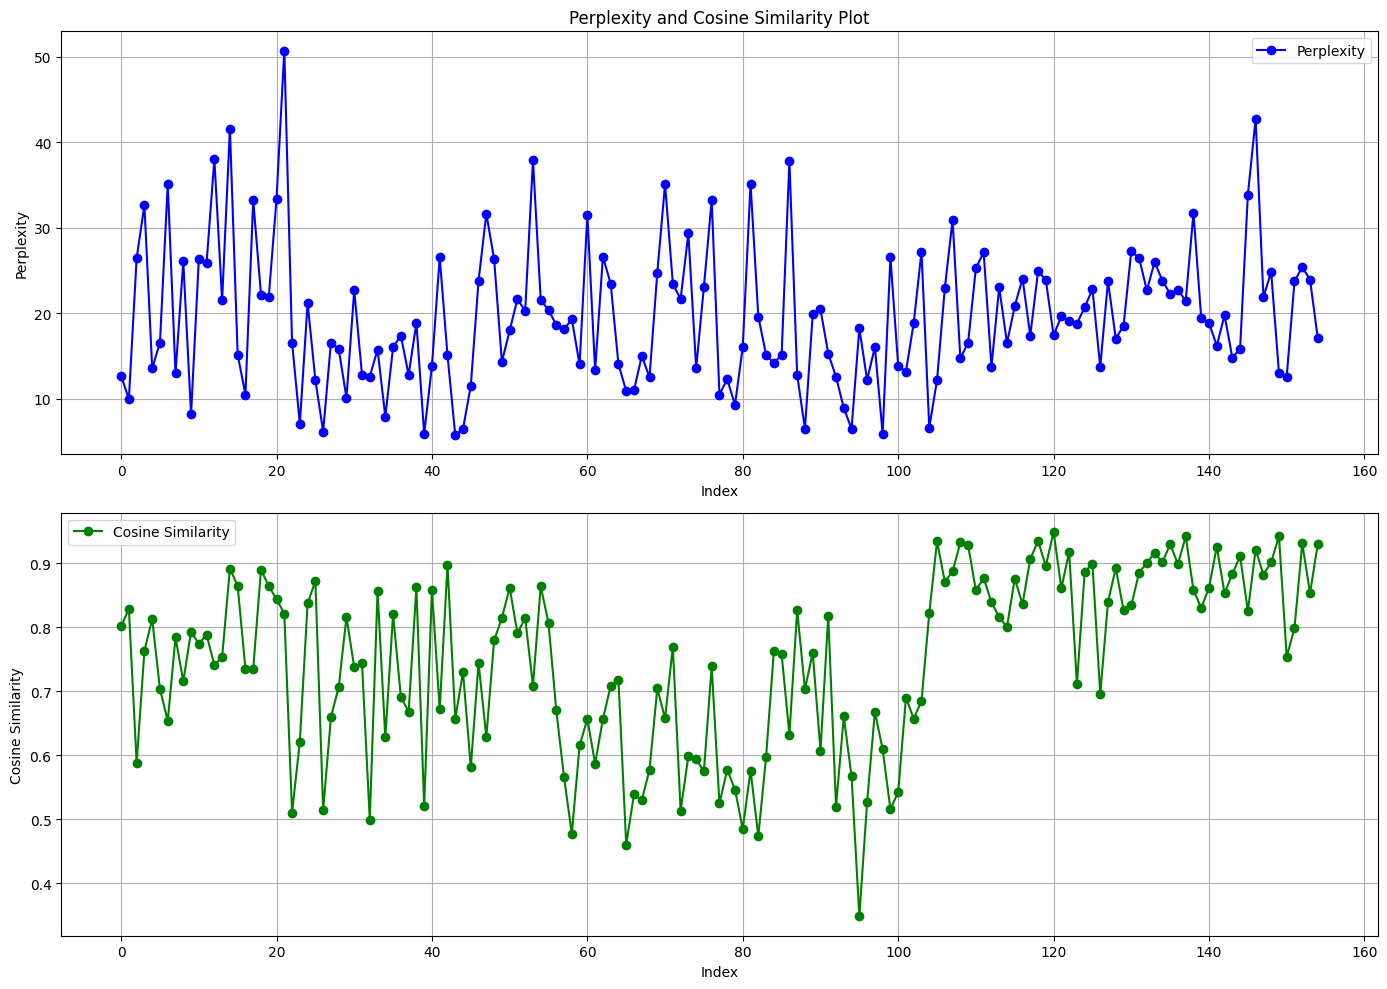

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
evaluation_csv_path = '/content/updated_evaluation_results.csv'
data = pd.read_csv(evaluation_csv_path)

# Step 2: Convert Perplexity and Cosine Similarity values to floats
data['Perplexity'] = data['Perplexity'].apply(lambda x: float(x.strip("[]")))
data['Cosine Similarity'] = data['Cosine Similarity'].apply(lambda x: float(x.strip("[]")))

# Step 3: Calculate and print average values
average_perplexity = data['Perplexity'].mean()
average_cosine_similarity = data['Cosine Similarity'].mean()

print(f"Average Perplexity: {average_perplexity:.2f}")
print(f"Average Cosine Similarity: {average_cosine_similarity:.2f}")


# Step 3: Plotting Perplexity and Cosine Similarity as time-series-like plots
plt.figure(figsize=(14, 10))

# Perplexity plot
plt.subplot(2, 1, 1)
plt.plot(data['Perplexity'], marker='o', linestyle='-', color='b', label='Perplexity')
plt.title("Perplexity and Cosine Similarity Plot")
plt.xlabel("Index")
plt.ylabel("Perplexity")
plt.legend()
plt.grid(True)

# Cosine Similarity plot
plt.subplot(2, 1, 2)
plt.plot(data['Cosine Similarity'], marker='o', linestyle='-', color='g', label='Cosine Similarity')
plt.xlabel("Index")
plt.ylabel("Cosine Similarity")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
